In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Synthetic data generation

In [2]:
def true_fun(x, a=np.pi, b=0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    
    if f is None: f = lambda x: x

    x = np.sum([ai * np.power(x, i + 1) for i, ai in enumerate(a)], axis=0)

    return f(x + b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max = 1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)
    
    if random_x:
        x = np.sort(np.random.rand(N)) * x_max    
    else:
        x = np.linspace(0, x_max, N)
    
    y_true = np.array([])
    
    for f_ in np.append([], f):
        y_true = np.append(y_true, true_fun(x, a, b, f_))
    
    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

In [3]:
def visualize_data(y, y_true, x, title):
    fig = plt.figure(figsize=(10, 7))
    plt.scatter(x[:, 0], y, edgecolor = 'b', label = "Noise data", s = 196, alpha = 0.6)
    plt.scatter(x[:, 0], y_true,label = "True data", s = 81, c = 'g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=15)
    plt.title(title, fontsize=15)
    plt.xticks()
    plt.yticks();
    plt.tight_layout()
    plt.show()

### 1.1 Linear data

#### 1.1.1 2x + 2

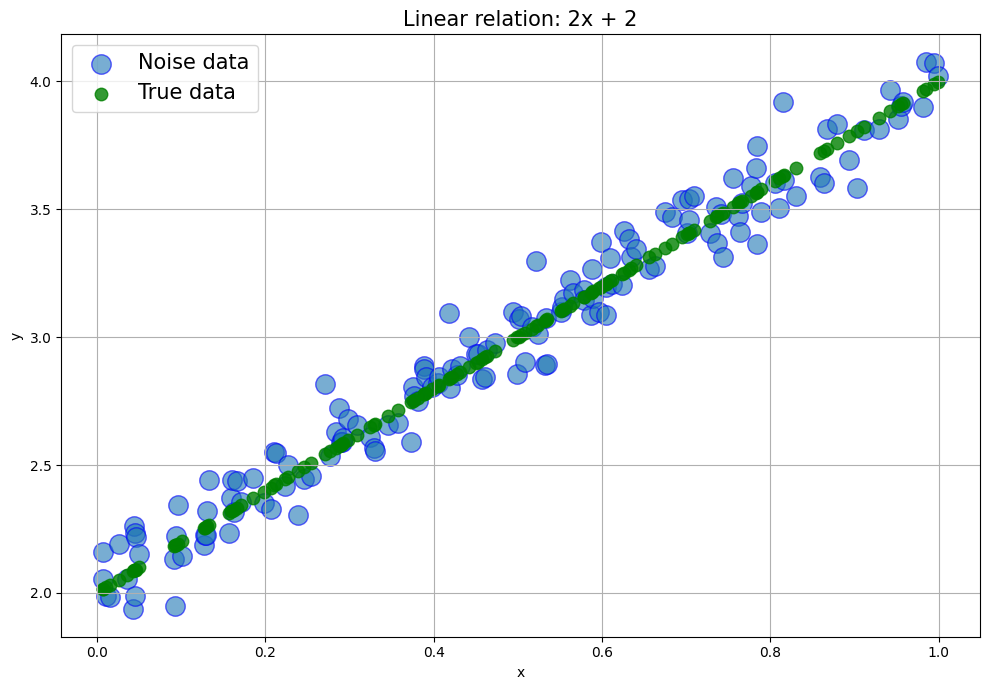

In [4]:
linear_1_y, linear_1_y_true, linear_1_x = dataset(
    a=2,
    b=2,
    f=None,
    N=150,
    x_max=1,
    noise_power=0.1,
    seed=32
)

visualize_data(linear_1_y, linear_1_y_true, linear_1_x, 'Linear relation: 2x + 2')

#### 1.1.2 x + 4

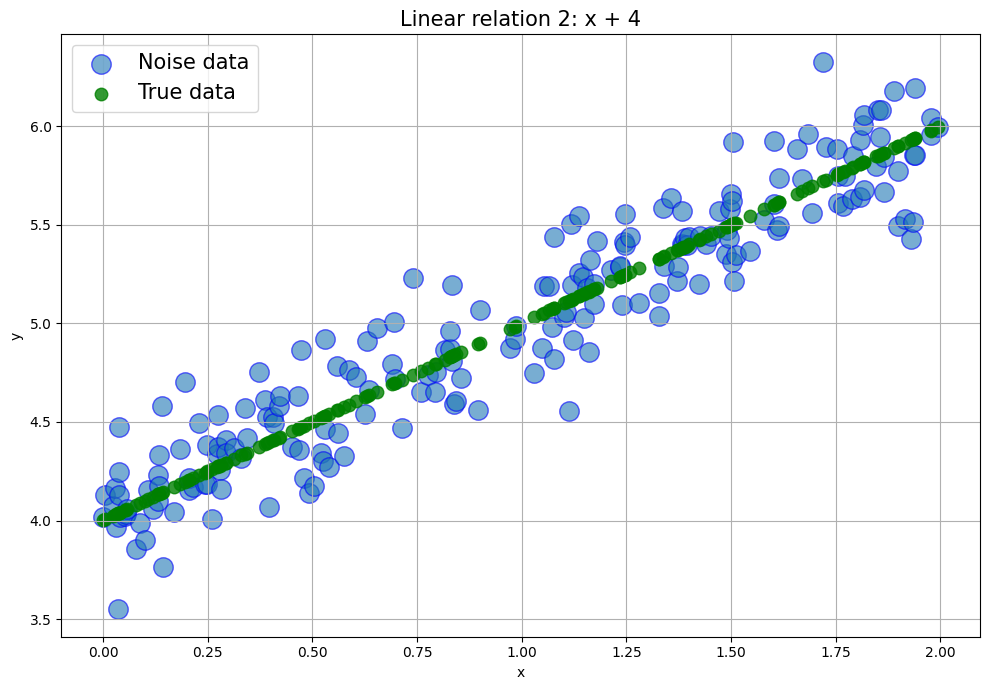

In [5]:
linear_2_y, linear_2_y_true, linear_2_x = dataset(
    a=1,
    b=4,
    f=None,
    N=200,
    x_max=2,
    noise_power=0.2,
    seed=1
)

visualize_data(linear_2_y, linear_2_y_true, linear_2_x, 'Linear relation 2: x + 4')

### 1.2 Cosine relation

#### 1.2.1 cos(2x + 2)

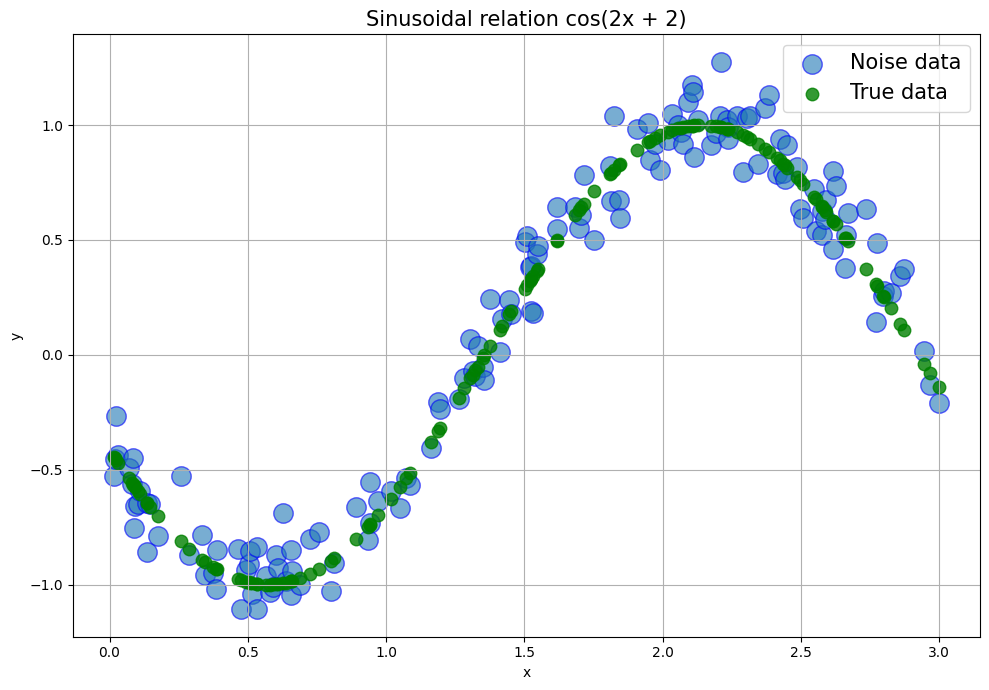

In [6]:
sinusoidal_y, sinusoidal_y_true, sinusoidal_x = dataset(
    a=2,
    b=2,
    f=np.cos,
    N=150,
    x_max=3,
    noise_power=0.1,
    seed=22
)

visualize_data(sinusoidal_y, sinusoidal_y_true, sinusoidal_x, 'Sinusoidal relation cos(2x + 2)')

### 1.3 Polynomial data

#### 1.3.1 x - 2x^2 + 1x^3 + 1

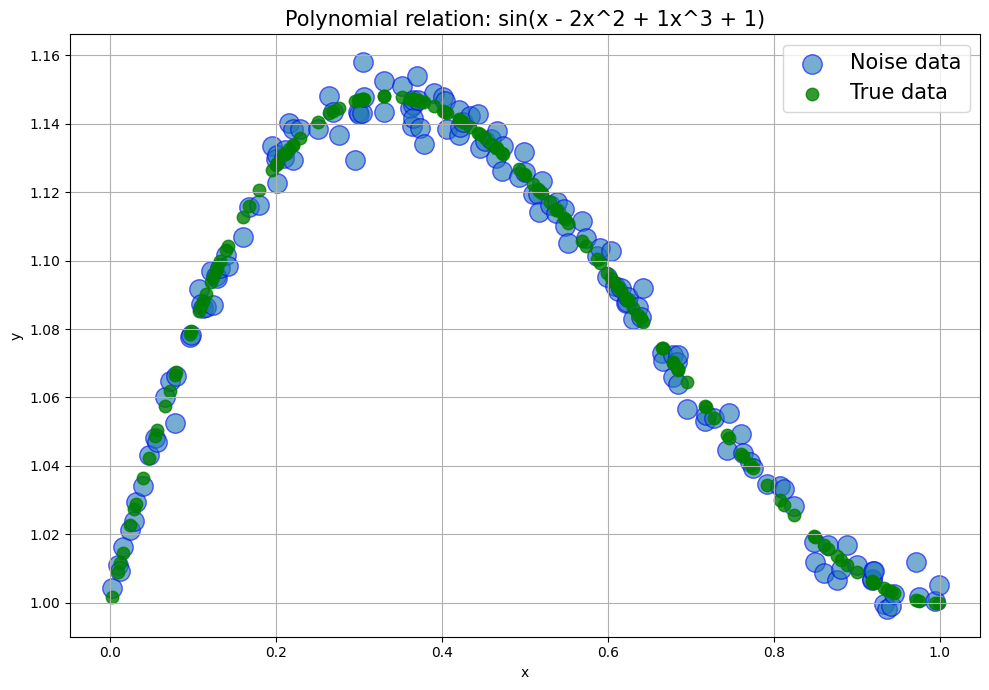

In [7]:
polynomial_1_y, polynomial_1_y_true, polynomial_1_x = dataset(
    a=[1, -2, 1],
    b=1,
    f=None,
    N=150,
    x_max=1,
    noise_power=0.005,
    seed=15
)

visualize_data(polynomial_1_y, polynomial_1_y_true, polynomial_1_x, 'Polynomial relation: sin(x - 2x^2 + 1x^3 + 1)')

#### 1.3.2 x^3 - 3x^2 + 1x + 1

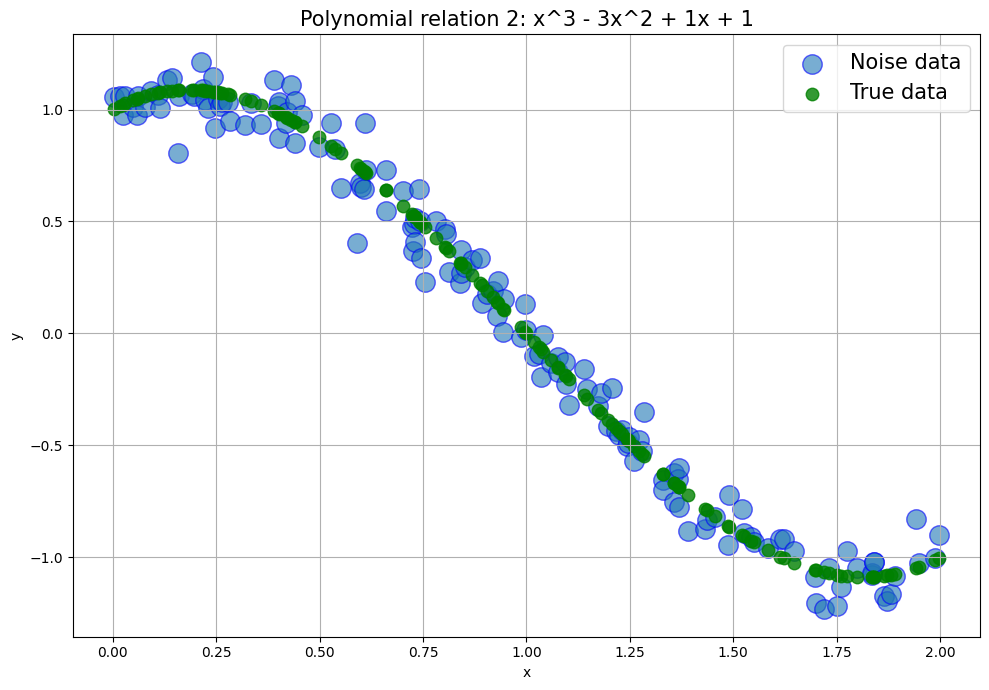

In [8]:
polynomial_2_y, polynomial_2_y_true, polynomial_2_x = dataset(
    a=[1, -3, 1],
    b=1,
    f=None,
    N=150,
    x_max=2,
    noise_power=0.1,
    seed=15
)

visualize_data(polynomial_2_y, polynomial_2_y_true, polynomial_2_x, 'Polynomial relation 2: x^3 - 3x^2 + 1x + 1')

#### 1.3.3 x - 4x^2 + 3x^3 + 2x^4

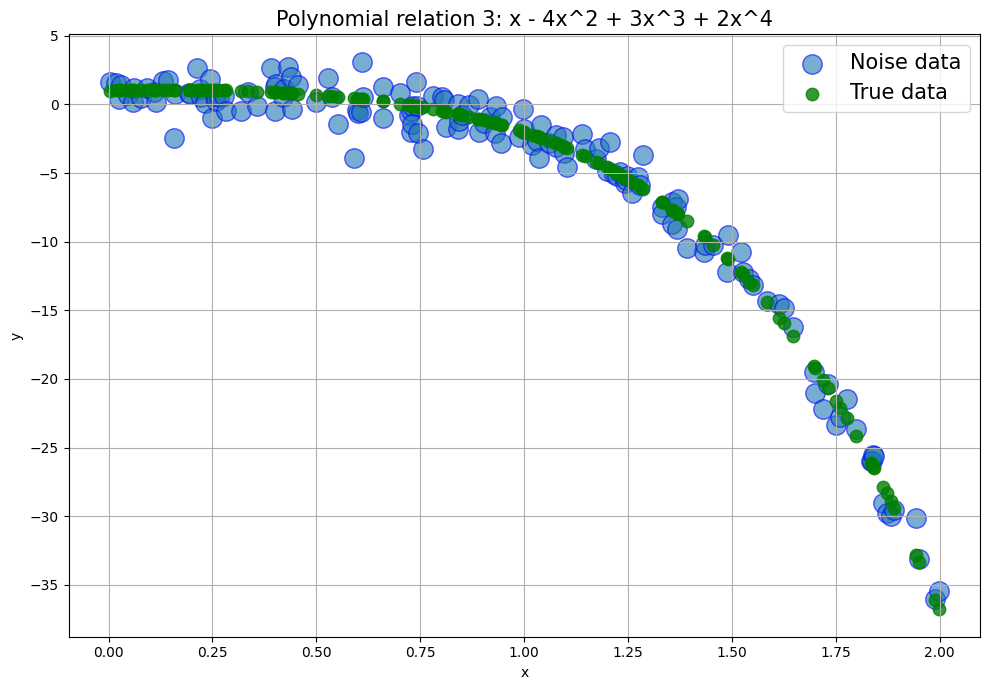

In [9]:
polynomial_3_y, polynomial_3_y_true, polynomial_3_x = dataset(
    a=[1, -4, 3, -3],
    b=1,
    f=None,
    N=150,
    x_max=2,
    noise_power=1.25,
    seed=15
)

visualize_data(polynomial_3_y, polynomial_3_y_true, polynomial_3_x, 'Polynomial relation 3: x - 4x^2 + 3x^3 + 2x^4')

## 2. Main execution block for different synthetic datasets

### 2.1 execution for 2x + 2 [1.1.1]

In [10]:
def train_test_split(x, y, train_size=None, test_size=None, random_state=42, shuffle=True):
    if random_state:
        np.random.seed(random_state)

    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle:
        np.random.shuffle(idxs)

    if test_size and train_size is None:
        if (test_size <= 1):
            train_size = 1 - test_size
        else:
            train_size = size - test_size

        test_size = None   

    if train_size is None or train_size > size:
        train_size = size

    if (train_size <= 1):
        train_size *= size

    if test_size is not None: 
        if test_size <= 1:
            test_size *= size    

        if test_size > size:
            test_size = size - train_size
    else:
        test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val, y_val = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]

    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, x_val, x_test, y_train.squeeze(), y_val.squeeze(), y_test.squeeze() 

    return x_train, x_val, y_train.squeeze(), y_val.squeeze()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(linear_1_x, linear_1_y, test_size=0.3)    
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(105, 1) (105,) (45, 1) (45,)


In [12]:
def init_weights(W_shape, add_bias = True, random_state = 42):
    W_shape = np.atleast_1d(W_shape)
    if random_state:
        np.random.seed(random_state)
    W = np.random.randn(*list(W_shape)) / np.sqrt(np.sum(W_shape))
    if add_bias:
        W = np.column_stack((np.zeros(W.shape[-1]), W))
    return W.squeeze()

In [13]:
def predict( X, W, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]), X))
    else:
        X_full = X

    return  np.dot(X_full, W)

In [14]:
def loss_func(yhat, y):
    return np.square(yhat - y)

In [15]:
weights = init_weights(linear_1_x.shape[1])
yhat = predict(x_train[0], weights)
loss = loss_func(yhat, linear_1_y[0])

print(f'Веса {weights}')

print(f'Первая точка-признак {x_train[0]},\nПредсказание {yhat},\nРеальное значение {linear_1_y[0]},\nФункция потерь: {loss}')

Веса [0.         0.49671415]
Первая точка-признак [0.47272312],
Предсказание [0.23480826],
Реальное значение [2.05260682],
Функция потерь: [3.30439159]


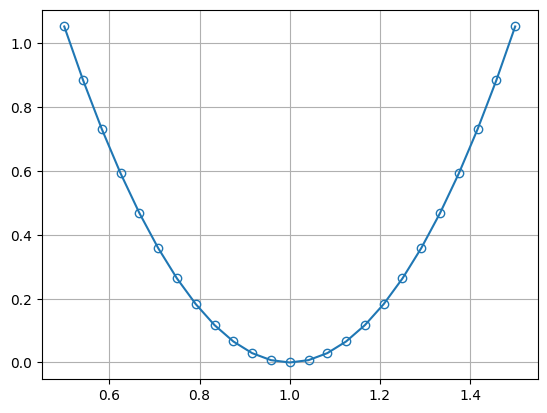

In [16]:
decline = np.linspace(start = 0.5, stop = 1.5, num = 25)
yhat = decline * linear_1_y[0]
loss = loss_func(yhat, linear_1_y[0])
plt.plot(decline, loss,'-o', mfc = 'none')
plt.grid()

In [17]:
def grad_loss(y_hat, y, X, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]), X))
    else:
        X_full = X
  
    return 2 * np.dot(X_full.T, (y_hat - y)) / y.size

In [18]:
yhat = predict(x_train[0], weights)

grad = grad_loss(yhat, linear_1_y[0], linear_1_x[0])
print(grad)

[-3.63559711 -0.02488869]


In [19]:
def update_weights(grad, W, learning_rate):
    return W - learning_rate * grad

In [20]:
learning_rate = 0.1
weights = update_weights(grad, weights, learning_rate)
print(weights)

[0.36355971 0.49920302]


In [21]:
yhat = predict(x_train[0], weights)
loss = loss_func(yhat, linear_1_y[0])

print(f'Веса {weights}')

print(f'Первая точка-признак {x_train[0]},\nПредсказание {yhat},\nРеальное значение {linear_1_y[0]},\nФункция потерь: {loss}')

Веса [0.36355971 0.49920302]
Первая точка-признак [0.47272312],
Предсказание [0.59954452],
Реальное значение [2.05260682],
Функция потерь: [2.11139005]


In [22]:
def fit(X, y, learning_rate, weights = None,  epochs=30):
    if weights is None:
        weights = init_weights(X.shape[1])

    cost = np.zeros(epochs)

    for i in range(epochs):
        yhat = predict(X, weights)
        grad = grad_loss(yhat, y, X)
        weights = update_weights(grad, weights, learning_rate)
        cost[i] = loss_func(yhat, y).mean()
                
    return weights, cost

In [23]:
y_train

array([2.97624188, 2.22547107, 3.47990709, 2.90461752, 3.07104375,
       2.55189293, 2.87698773, 3.81300528, 2.93218376, 2.89248607,
       3.53558305, 2.1321448 , 2.44571309, 1.98955963, 2.22493671,
       2.88565696, 3.31381689, 2.93273226, 2.7493642 , 3.61263935,
       2.35250943, 3.7485505 , 2.4376755 , 3.48761285, 3.91998712,
       3.91720071, 3.48814665, 3.85304434, 2.68102554, 2.32639111,
       2.23268572, 2.34419542, 2.85373057, 2.15278021, 2.58950097,
       3.89926256, 2.66508312, 2.35734611, 2.18992194, 2.54655492,
       3.96650512, 3.0966445 , 3.11725904, 2.1435186 , 2.21727424,
       3.01238569, 3.55132451, 3.83488892, 2.85736938, 3.46877504,
       3.3725747 , 3.34486874, 2.88700597, 2.05260682, 3.410943  ,
       2.99890724, 2.45045828, 2.62780548, 2.60618076, 2.8189458 ,
       3.52529107, 2.44272972, 2.31747789, 2.37163209, 3.1532676 ,
       2.53466725, 3.09806595, 3.366802  , 2.61031703, 3.19500171,
       3.45839615, 2.4193705 , 3.69094615, 3.20238585, 3.09250

In [24]:
weights, cost = fit(x_train, y_train, learning_rate=0.1, epochs=10)

In [25]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15);
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция потерь",fontsize=35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25);  
    plt.show()

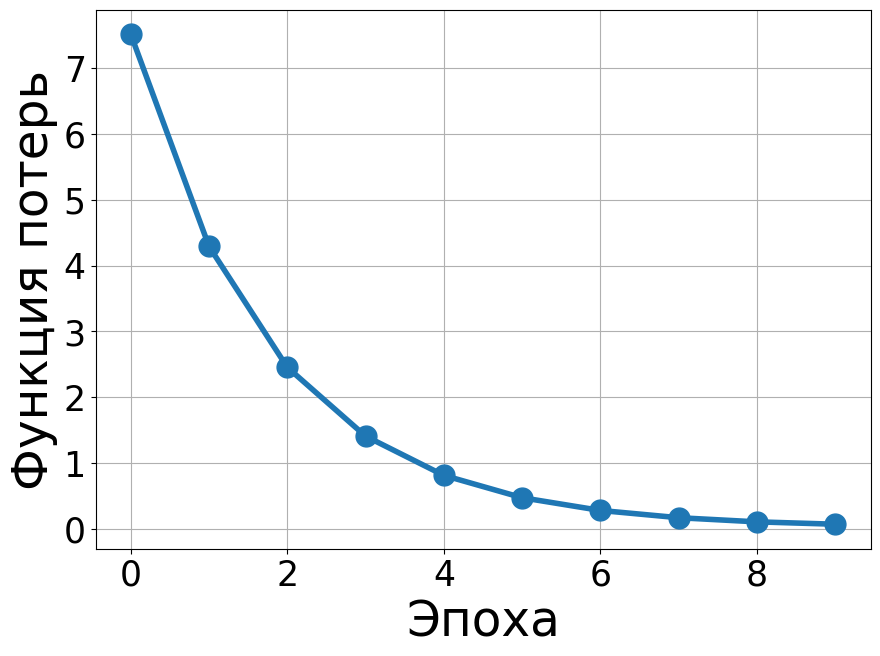

In [26]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

In [27]:
def r2_score(yhat, y):
    return 1 - (np.square(y - yhat)).sum(axis=0) / (np.square(y - np.mean(y, axis=0))).sum(axis=0)

In [28]:
predicts = predict(x_test, weights)

r2_score(predicts, y_test), r2_score(predict(x_train, weights), y_train)

(0.8225123563853747, 0.8495011734361887)

In [29]:
def plot_model_weights(x_train, y_train, x_test, x, y, weights):
    plt.plot(x_train[:,0], predict(x_train,weights, ),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], predict(x_test,weights, ),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2, c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные значения", linewidth=4, c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35);
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25);
    plt.show()

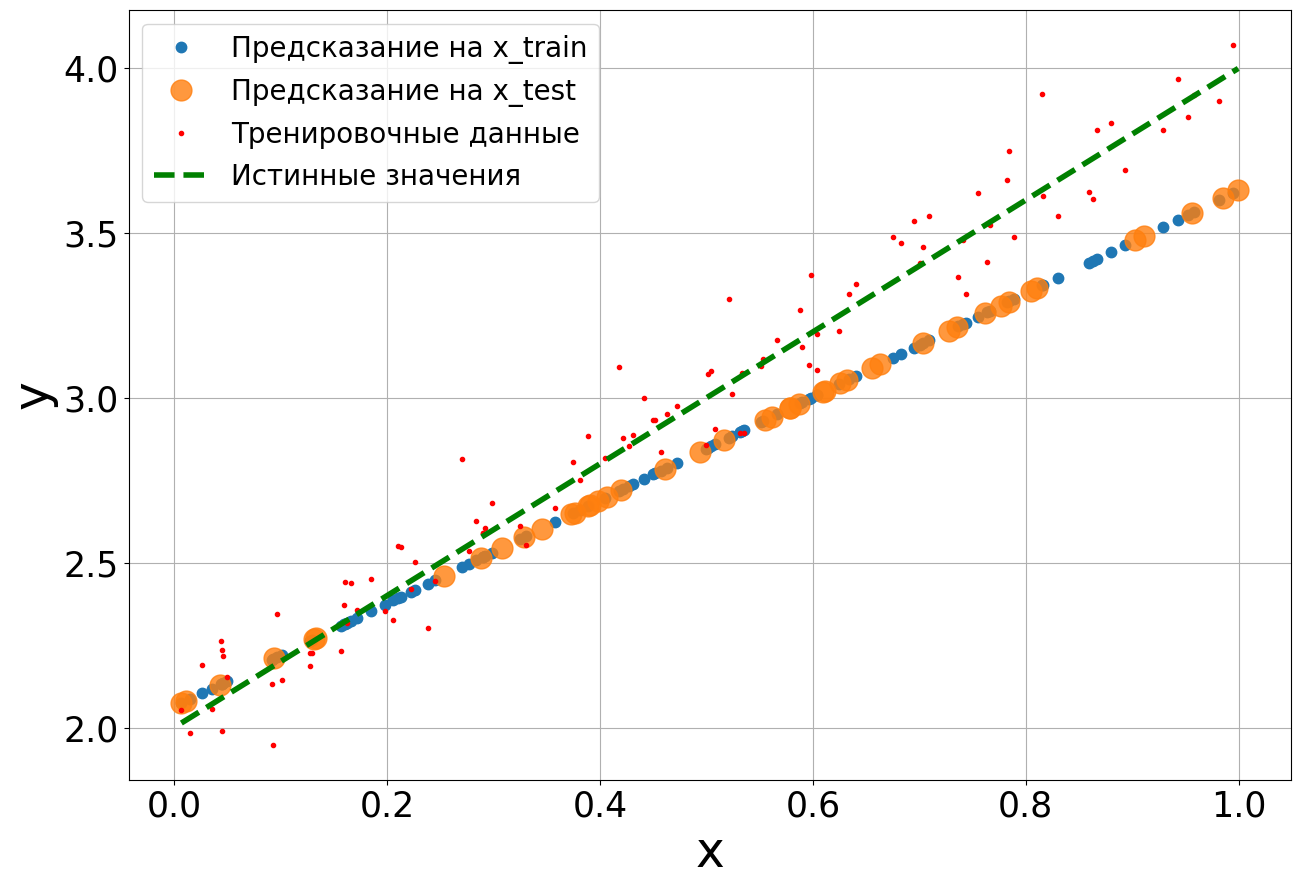

In [30]:
fig = plt.figure(figsize=(15, 10))

plot_model_weights(x_train, y_train, x_test, linear_1_x, linear_1_y_true, weights)

In [31]:
weights

array([2.06227784, 1.56830609])

In [32]:
def vis_weights(weights):
    numbers = np.arange(0, len(weights))
    tick_labels = ['w' + str(num) for num in numbers]
    cc = [''] * len(numbers)
    for n,val in enumerate(weights):
        if val < 0:
            cc[n] = 'red'
        elif val >= 0:
            cc[n] = 'blue'

    plt.bar(x = numbers, height = weights, color = cc) 
    plt.xticks(np.arange(0, len(weights)), tick_labels);
    plt.show()

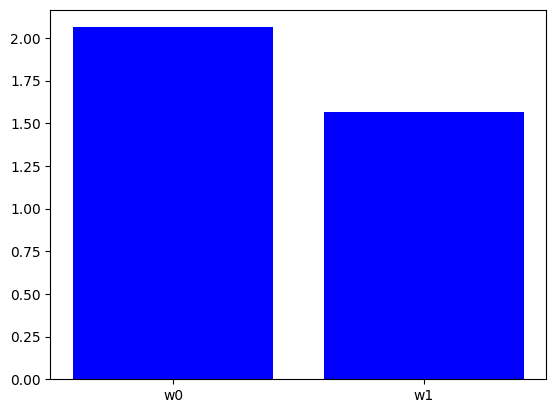

In [33]:
vis_weights(weights)

In [34]:
def load_batch(X,y, batch_size = 100):
    idxs = np.arange(y.size)
    np.random.shuffle(idxs)

    for i_batch in range(0,y.size,batch_size):
        idx_batch = idxs[i_batch:i_batch+batch_size]
        x_batch = np.take(X, idx_batch,axis=0)
        y_batch = np.take(y, idx_batch)
        yield  x_batch, y_batch

In [35]:
BATCH = 10

def fit_SGD(X, y, learning_rate, weights = None,  epochs=30, batch_size = 100, random_state = 42):
    if random_state: np.random.seed(random_state)

    if weights is None:
        weights = init_weights(X.shape[1])

    if batch_size is None or batch_size>y.size : batch_size = y.size  
    n_batches = y.size//batch_size 

    cost    = np.zeros(epochs) 

    for i in range(epochs): 

        loss = 0 
        for cnt,(x_batch, y_batch) in enumerate(load_batch(X,y, batch_size)): 
            yhat    = predict(x_batch, weights) 
            grad    = grad_loss(yhat,  y_batch, x_batch) 
            weights = update_weights(grad, weights, learning_rate) 
            loss   += loss_func(yhat,  y_batch).mean()

            if cnt>= n_batches: 
                break 

        cost[i] = loss/n_batches 

    return weights, cost 

In [36]:
weights = init_weights(x_train.shape[1], random_state=42)

weights, cost = fit_SGD(x_train, y_train, learning_rate=0.1, weights=weights, batch_size = 10,  epochs=10)

predicts = predict(x_test, weights)
r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.9659674947264911, 0.9631037247368355)

In [37]:
weights

array([2.08607415, 1.89390602])

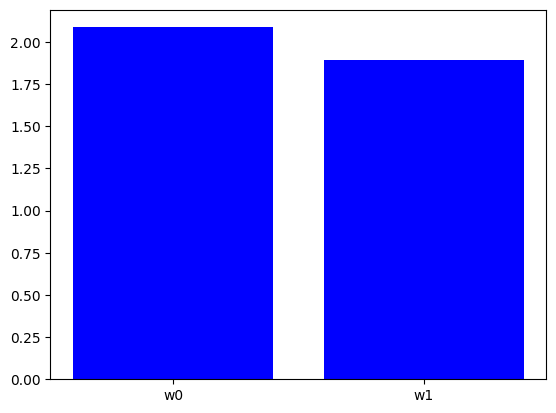

In [38]:
vis_weights(weights)

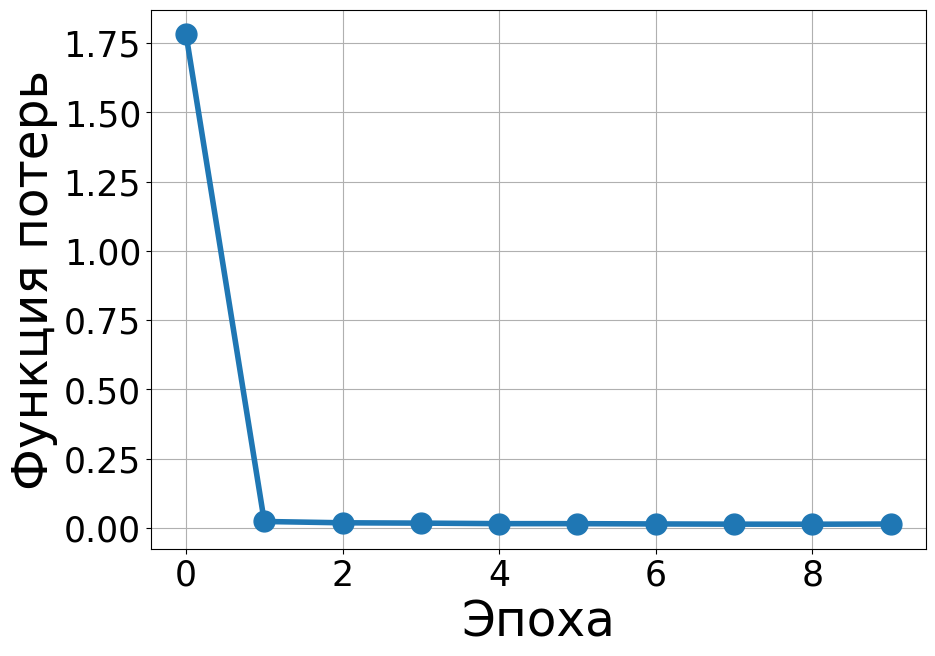

In [39]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

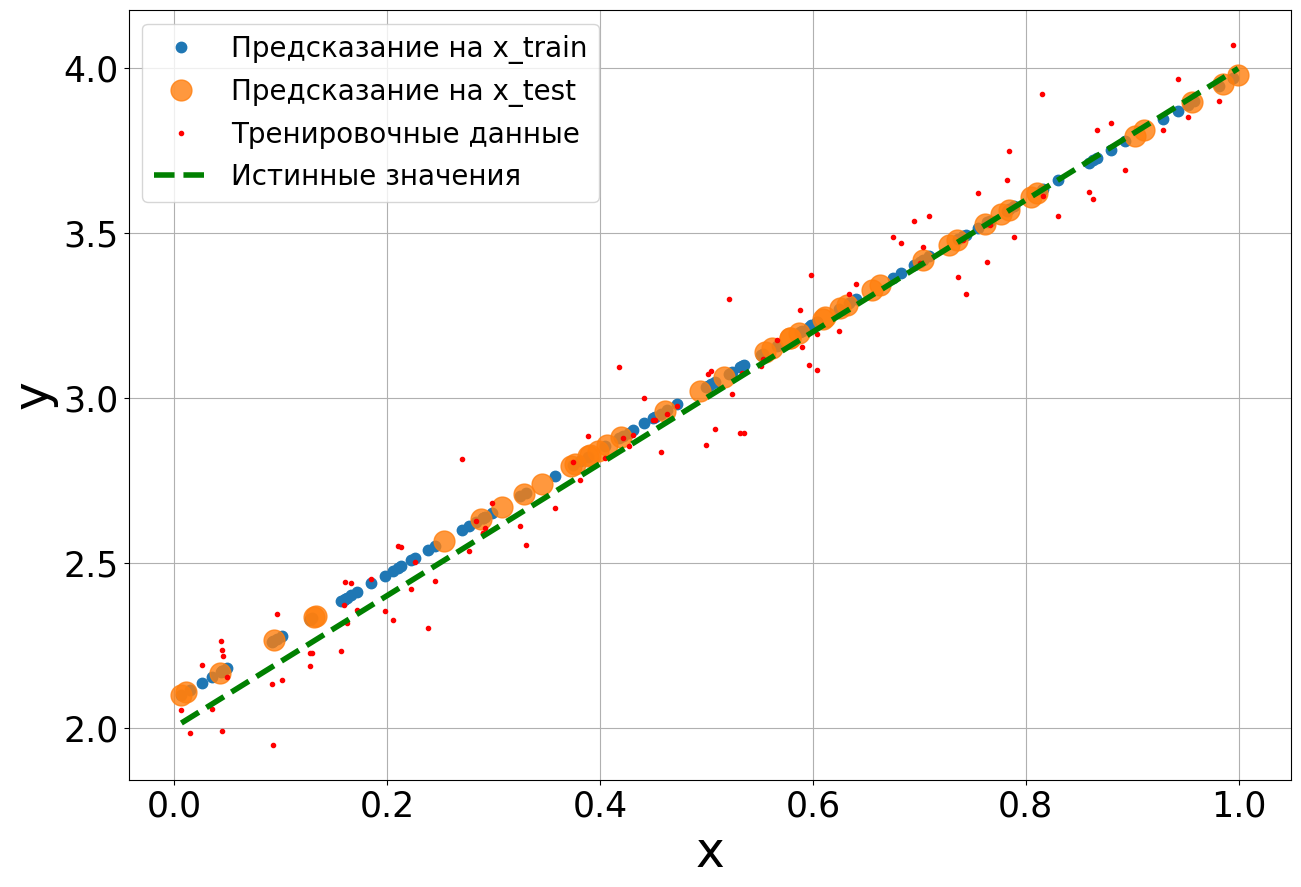

In [40]:
fig  = plt.figure(figsize=(15,10))

plot_model_weights(x_train, y_train, x_test, linear_1_x, linear_1_y_true, weights)

In [41]:
# Function to run all the above applying only to one dataset

def run_all(y, y_true, x):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    weights = init_weights(x.shape[1])
    yhat = predict(x_train[0], weights)
    loss = loss_func(yhat, y[0])

    print(f'Weights {weights}\n')

    print(f'Первая точка-признак {x_train[0]},\nПредсказание {yhat},\nРеальное значение {linear_1_y[0]},\nФункция потерь: {loss}\n')

    decline = np.linspace(start = 0.5, stop = 1.5, num = 25)
    yhat = decline * y[0]
    loss = loss_func(yhat, y[0])
    plt.plot(decline, loss, '-o', mfc = 'none')
    plt.grid()
    plt.show()

    yhat = predict(x_train[0], weights)
    grad = grad_loss(yhat, y[0], x[0])
    print("Grad function:\n", grad)

    learning_rate = 0.1
    weights = update_weights(grad, weights, learning_rate)
    print("\nWeight values:")
    print(weights)

    yhat = predict(x_train[0], weights)
    loss = loss_func(yhat, y[0])
    
    print(f'Веса {weights}\n')
    
    print(f'Первая точка-признак {x_train[0]},\nПредсказание {yhat},\nРеальное значение {y[0]},\nФункция потерь: {loss}\n')
    display(y_train)

    weights, cost = fit(x_train, y_train, learning_rate=0.1, epochs=10)

    fig  = plt.figure(figsize=(10,7))
    print("\nCost function:")
    plot_cost(cost)

    predicts = predict(x_test, weights)
    print(f"{r2_score(predicts, y_test)}, {r2_score(predict(x_train, weights), y_train)}\n")

    fig = plt.figure(figsize=(15, 10))
    print("\nModel visualization:")
    plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

    print("\nWeights:")
    vis_weights(weights)

    weights = init_weights(x_train.shape[1], random_state=42)

    weights, cost = fit_SGD(x_train, y_train, learning_rate=0.1, weights=weights, batch_size=10,  epochs=10)
    
    predicts = predict(x_test, weights)
    print("\nPredicts:")
    print(f"{r2_score(predicts, y_test)}, {r2_score(predict(x_train, weights), y_train)}\n")
    
    print("\nWeights:")
    display(weights)
    vis_weights(weights)

    print("\nCost function:")
    fig  = plt.figure(figsize=(15,10))
    plot_cost(cost)

    print("\nFinal model visualization:")
    fig  = plt.figure(figsize=(15,10))
    plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

    return weights

### 2.2 execution for x + 4 [1.1.2]

(140, 1) (140,) (60, 1) (60,)
Weights [0.         0.49671415]

Первая точка-признак [0.98314632],
Предсказание [0.48834269],
Реальное значение [2.05260682],
Функция потерь: [12.44290551]



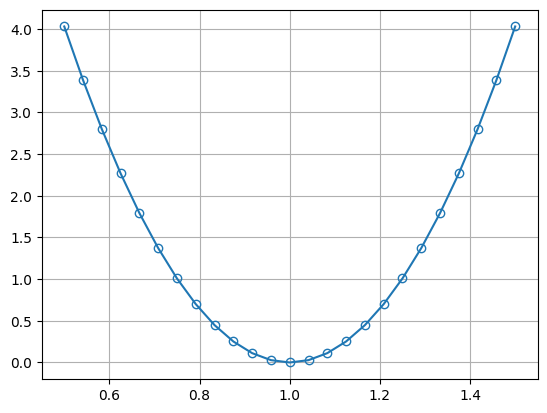

Grad function:
 [-7.05490057e+00 -1.61380593e-03]

Weight values:
[0.70549006 0.49687553]
Веса [0.70549006 0.49687553]

Первая точка-признак [0.98314632],
Предсказание [1.19399141],
Реальное значение [4.01579298],
Функция потерь: [7.96256408]



array([4.92094932, 3.90050155, 4.49578337, 5.52273911, 5.10346546,
       4.85435438, 4.76239608, 5.88369434, 5.74468873, 4.41857956,
       4.78124395, 5.79846068, 5.73030475, 4.47059064, 5.66454018,
       5.64153955, 4.35626309, 5.31053915, 4.65345525, 4.32818   ,
       5.41059238, 4.15648492, 5.47376726, 5.06483023, 4.27132063,
       4.17450724, 4.86480749, 4.4435832 , 5.55539205, 5.29009905,
       4.01972922, 4.23096445, 4.63074967, 4.79166963, 5.57979171,
       5.032899  , 5.28550006, 5.56804424, 5.88264423, 5.00729283,
       5.23004213, 6.04193778, 4.25646329, 4.04070509, 5.28958969,
       6.19489711, 4.16972541, 4.09705971, 5.44216338, 4.9605626 ,
       5.17802377, 5.59305845, 3.549609  , 5.39910555, 5.09663088,
       4.66054513, 5.39694184, 4.87707735, 5.61116558, 4.98716113,
       5.89200063, 4.75045414, 4.18522534, 4.06009486, 4.33562   ,
       5.41902205, 4.3697158 , 5.77442527, 4.60575162, 5.40087885,
       4.49296094, 5.43641678, 5.73857109, 4.3416592 , 5.19991


Cost function:


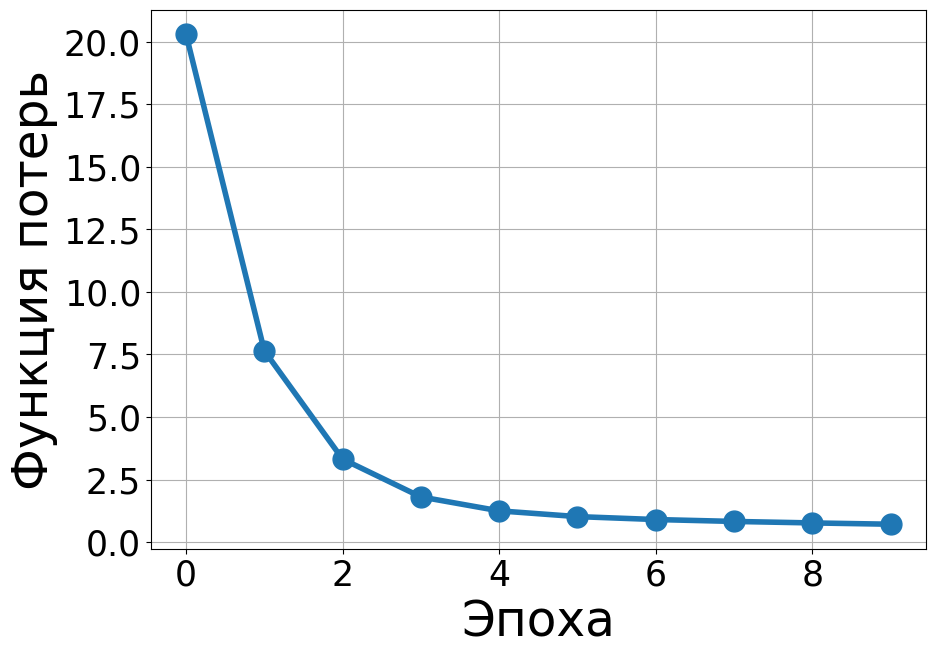

-0.7117306933992584, -0.7413471680866024


Model visualization:


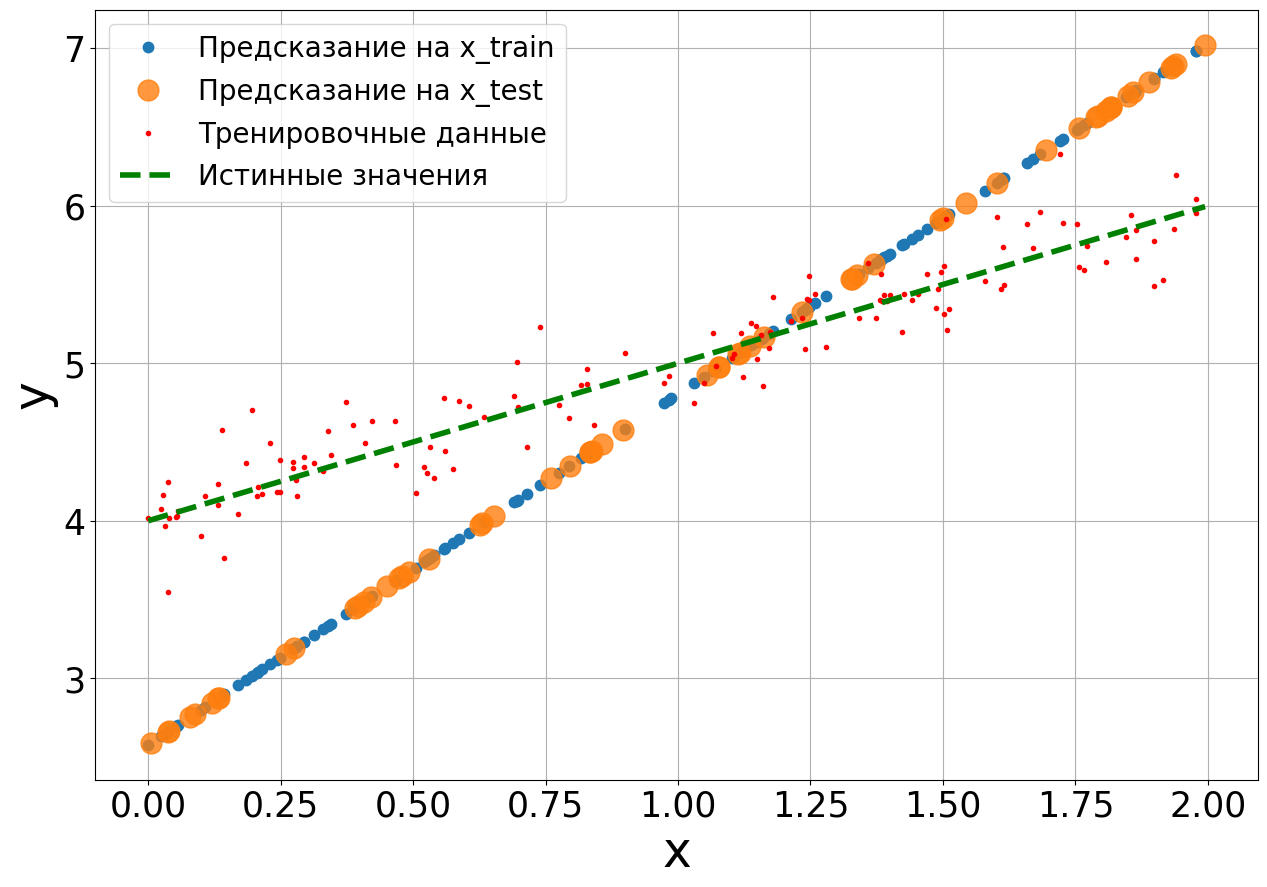


Weights:


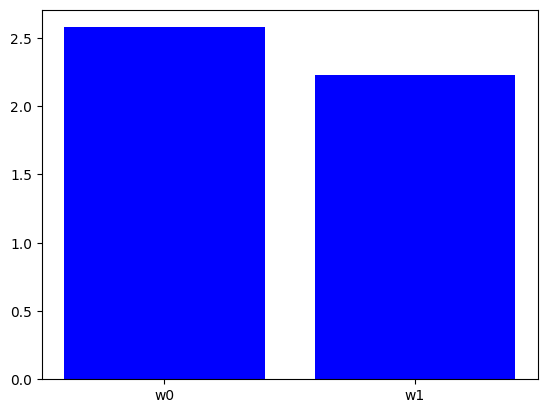


Predicts:
0.857889698620156, 0.9074799638009634


Weights:


array([4.02858772, 1.01000754])

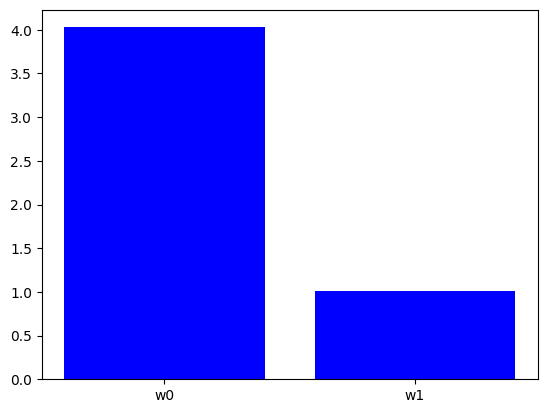


Cost function:


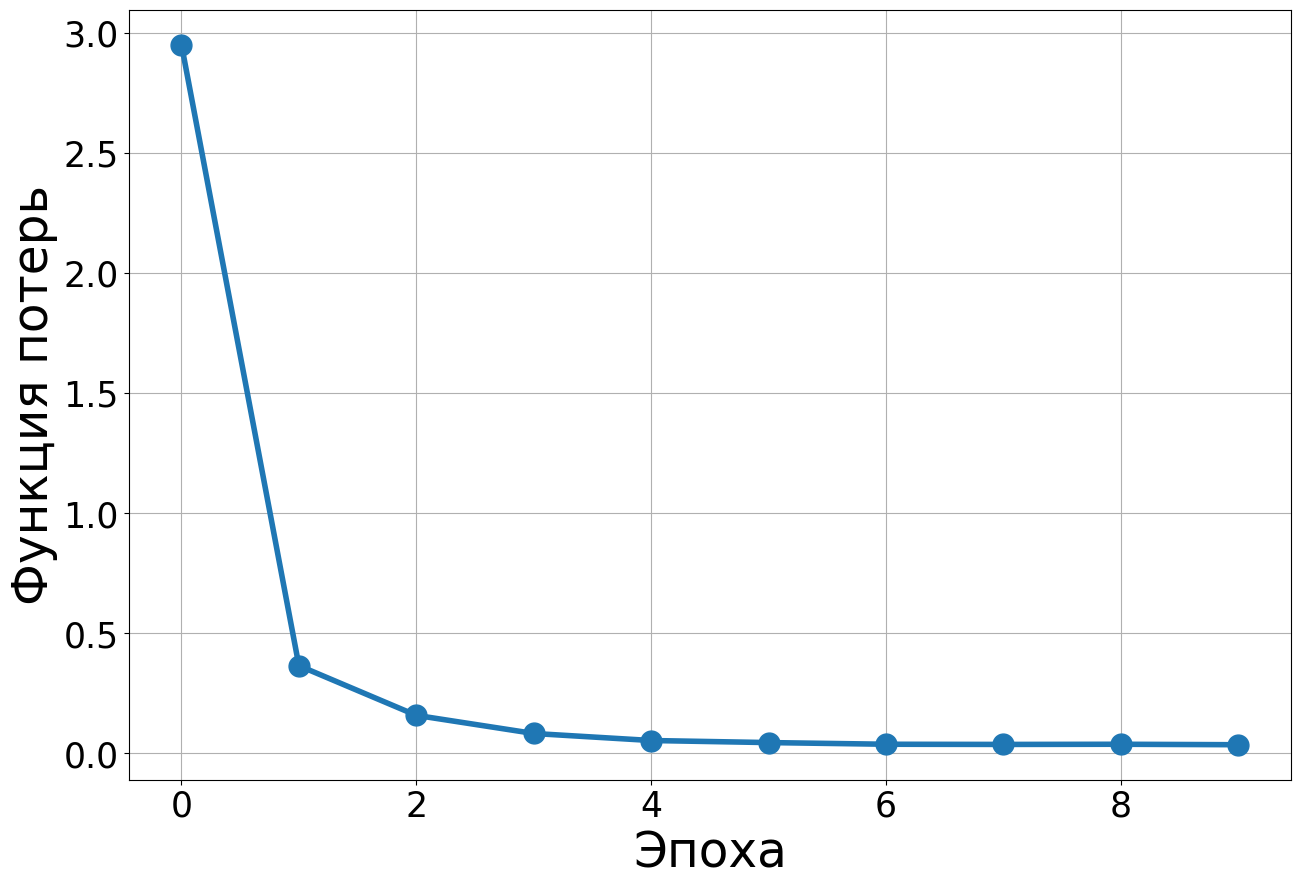


Final model visualization:


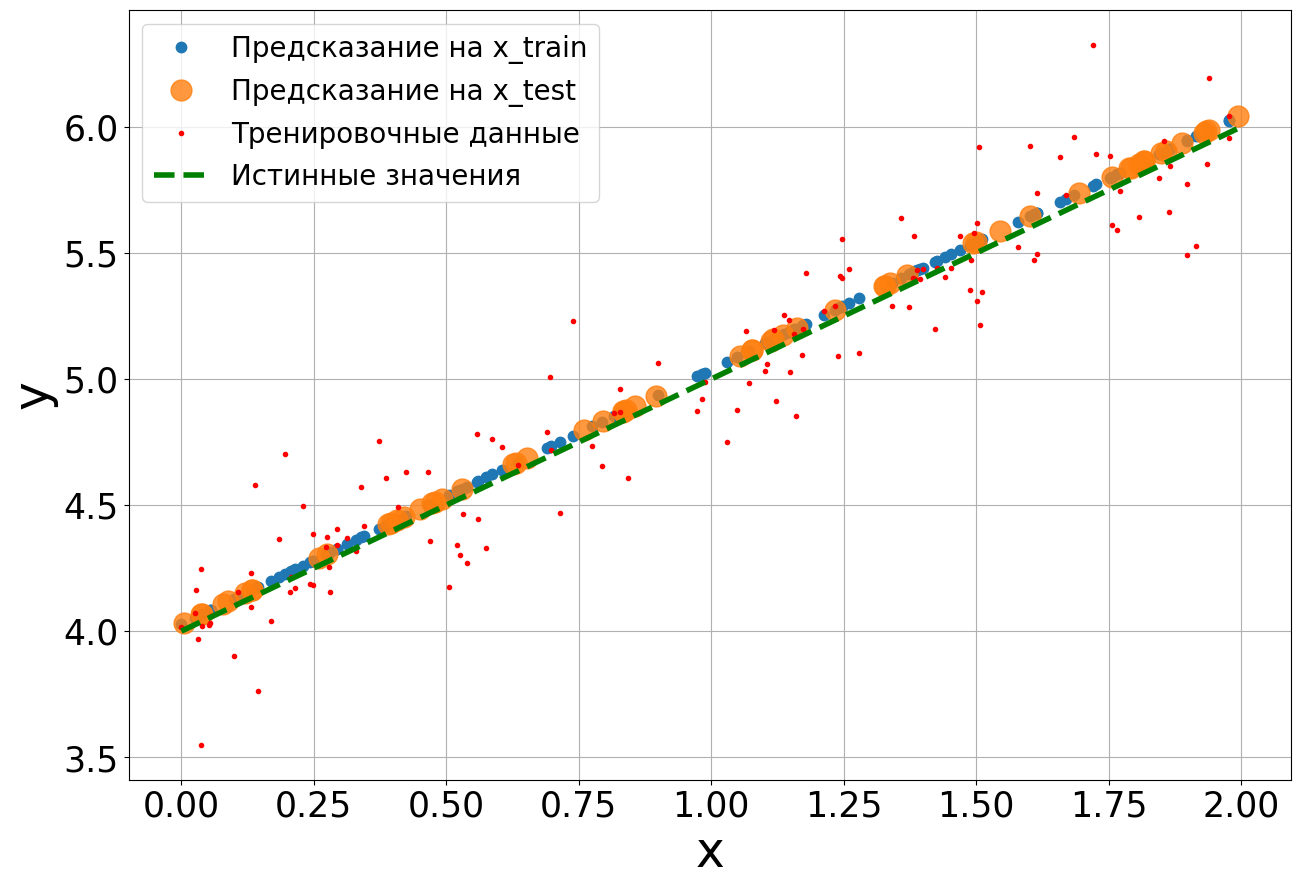

In [42]:
linear_2_weights = run_all(linear_2_y, linear_2_y_true, linear_2_x)

In [43]:
display(linear_2_weights)

array([4.02858772, 1.01000754])

### 2.3 execution for cos(2x + 2) [1.2.1]

(105, 1) (105,) (45, 1) (45,)
Weights [0.         0.49671415]

Первая точка-признак [1.52427049],
Предсказание [0.75712673],
Реальное значение [2.05260682],
Функция потерь: [1.65186485]



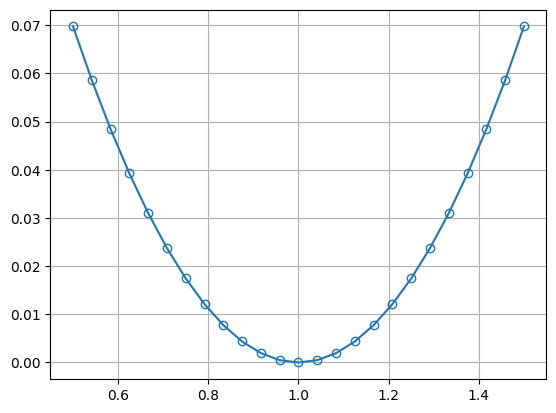

Grad function:
 [2.57049789 0.04250893]

Weight values:
[-0.25704979  0.49246326]
Веса [-0.25704979  0.49246326]

Первая точка-признак [1.52427049],
Предсказание [0.49359743],
Реальное значение [-0.52812222],
Функция потерь: [1.04391103]



array([ 0.19113534, -0.95674055,  1.13017113,  0.54539815,  0.44007247,
       -1.03274915, -0.10911789,  0.48653872,  0.23699288,  0.61005994,
        0.99198112, -0.85974172, -0.98254393, -0.65081393, -0.94927114,
       -0.23458233,  1.01973376,  0.17643343, -0.20448944,  0.67219622,
       -1.10584543,  0.720194  , -0.85297388,  0.54073306,  0.58925555,
        0.34303137,  1.27545576,  0.27898127, -0.66338288, -0.9639821 ,
       -0.84465083, -0.52878741,  0.24462347, -0.64427279, -0.76932771,
        0.3713002 , -0.66701852, -1.04071153, -0.49420226, -1.01247299,
        0.25637365,  0.81995248,  0.66873366, -0.87104073, -0.59376988,
        0.55061713,  0.79889116,  0.52157712,  0.18235409,  1.0228363 ,
        1.0474752 ,  0.91490733,  0.0111722 , -0.52812222,  0.76487581,
        0.1576401 , -0.83827464, -1.00095484, -0.90698109, -0.07252103,
        0.91214052, -0.93595059, -0.91251565, -1.10769319,  0.80345733,
       -0.94146675,  0.93654436,  1.0729068 , -0.55164238,  1.00


Cost function:


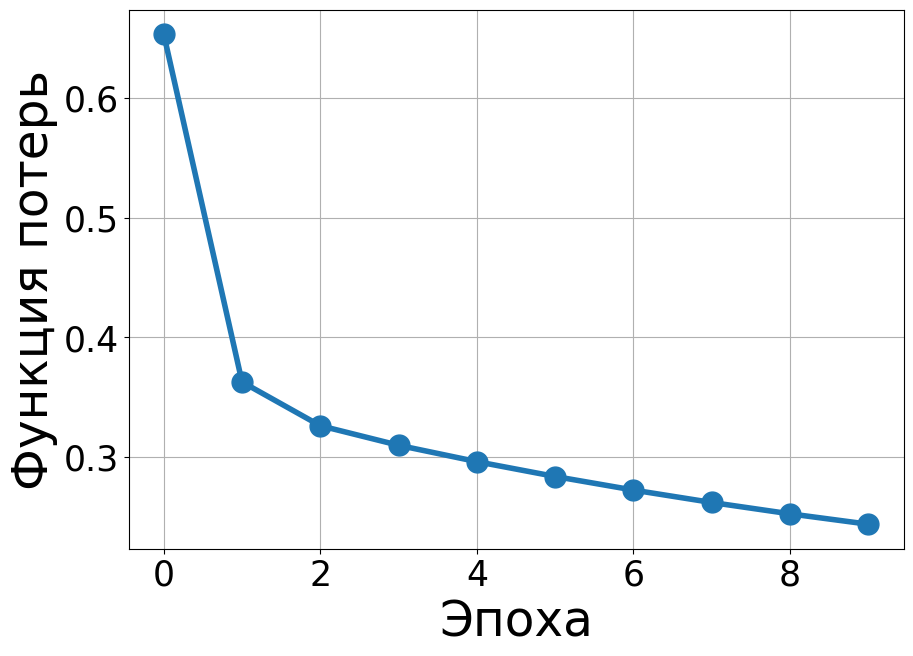

0.4741989771350751, 0.5743437447339625


Model visualization:


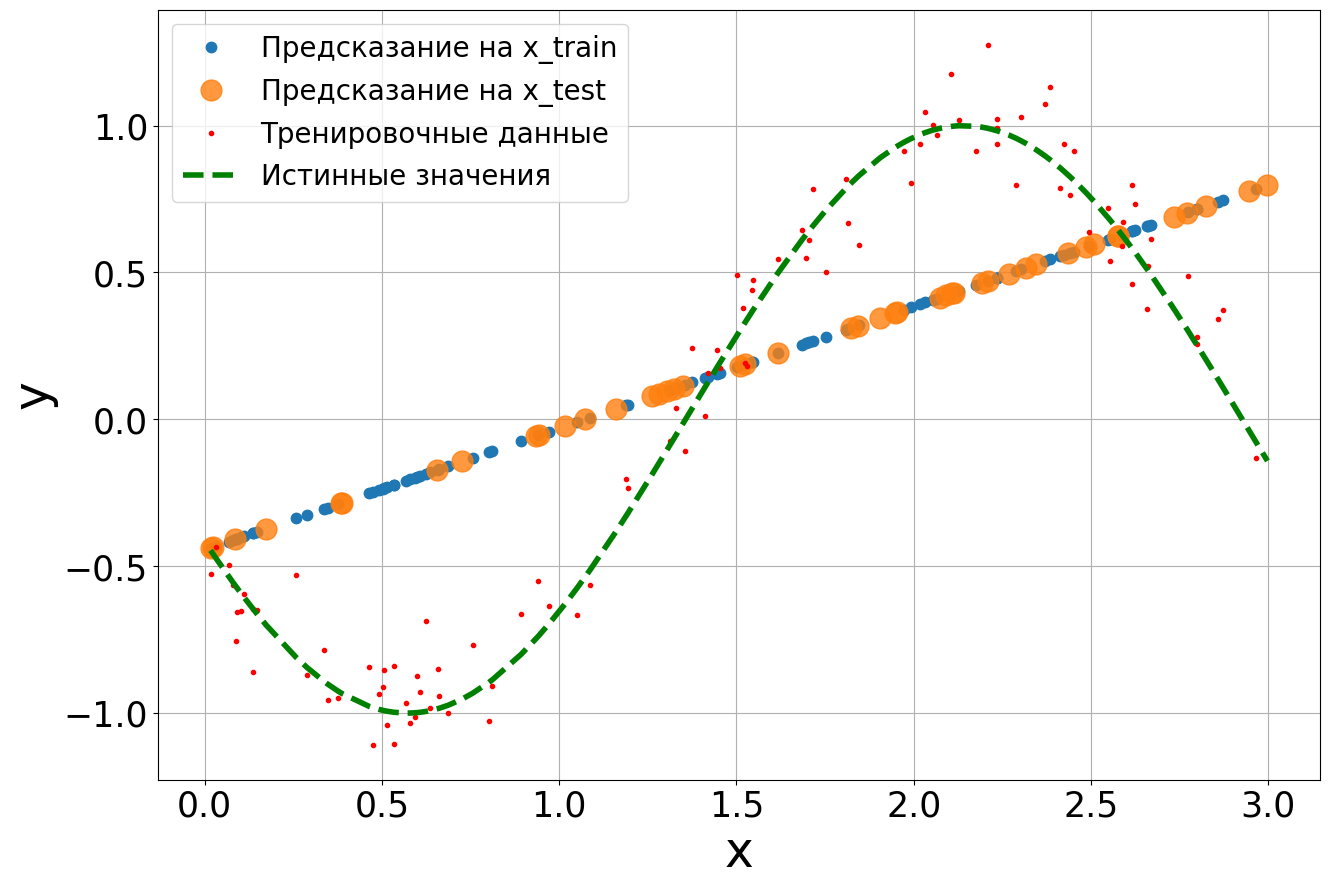


Weights:


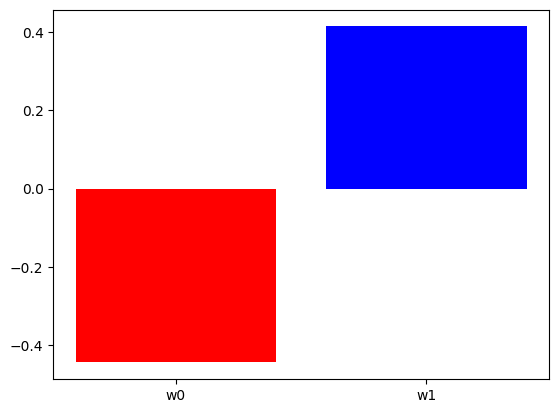


Predicts:
0.4685048781186868, 0.7097568292005522


Weights:


array([-0.97193402,  0.76126808])

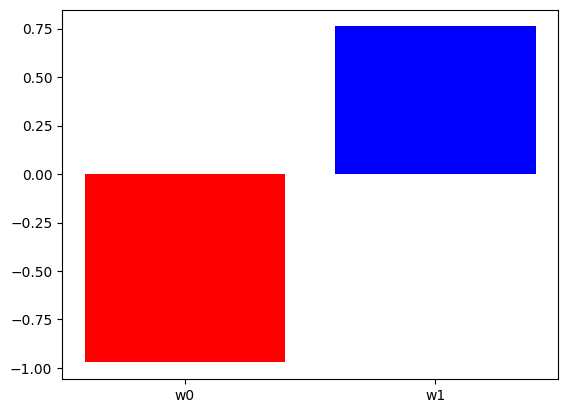


Cost function:


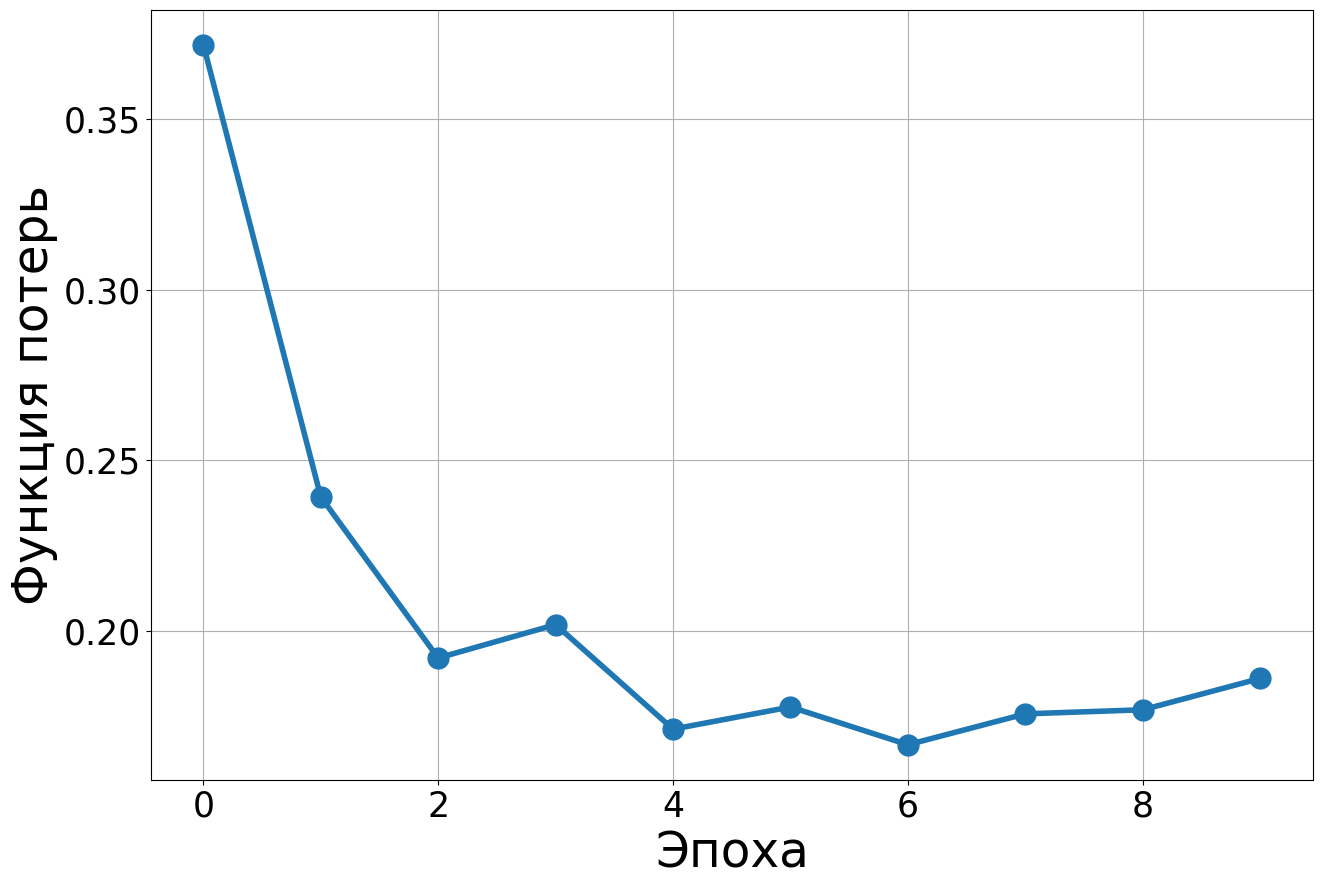


Final model visualization:


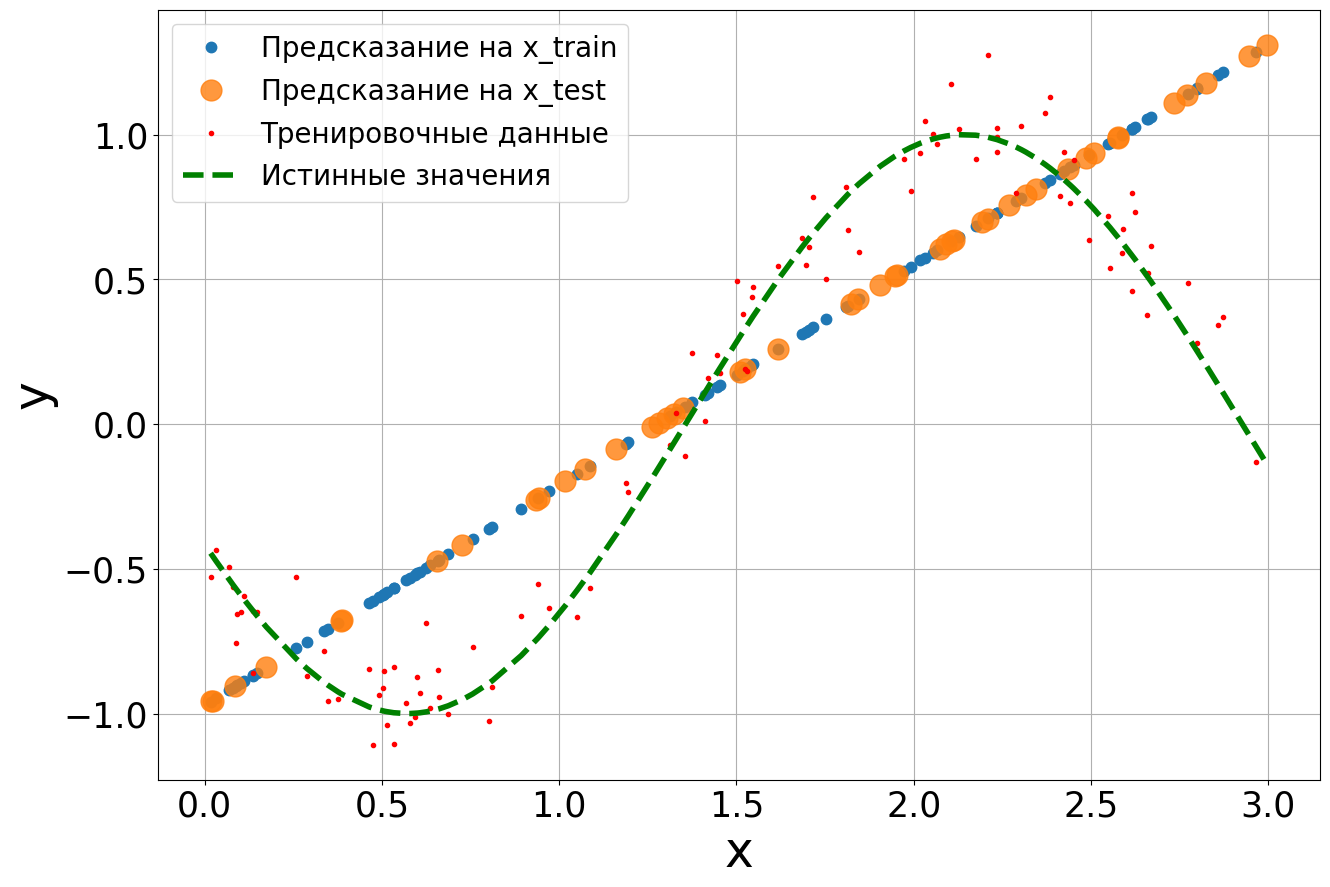

array([-0.97193402,  0.76126808])

In [44]:
run_all(sinusoidal_y, sinusoidal_y_true, sinusoidal_x)

### 2.4 execution for x - 2x^2 + 1x^3 + 1 [1.3.1]

(105, 1) (105,) (45, 1) (45,)
Weights [0.         0.49671415]

Первая точка-признак [0.44599815],
Предсказание [0.22153359],
Реальное значение [2.05260682],
Функция потерь: [0.61260482]



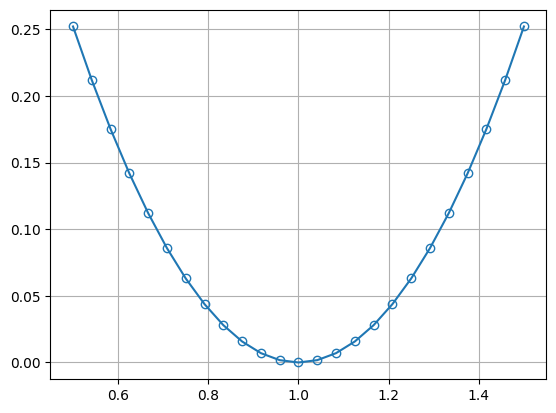

Grad function:
 [-1.56538152 -0.00257467]

Weight values:
[0.15653815 0.49697162]
Веса [0.15653815 0.49697162]

Первая точка-признак [0.44599815],
Предсказание [0.37818657],
Реальное значение [1.00422435],
Функция потерь: [0.3919233]



array([1.1330478 , 1.08720542, 1.05502002, 1.12632446, 1.13004664,
       1.133579  , 1.14779983, 1.00918186, 1.14415013, 1.12585273,
       1.07080114, 1.06471524, 1.13239046, 1.04807899, 1.08607456,
       1.14559251, 1.08924068, 1.13905231, 1.13941951, 1.00859312,
       1.11571879, 1.03406525, 1.10159058, 1.03311021, 1.01183648,
       1.00243611, 1.09194683, 0.99807166, 1.12931502, 1.11638284,
       1.08701555, 1.07770319, 1.14679629, 1.06016222, 1.14814526,
       1.01176763, 1.15248143, 1.09841179, 1.02136121, 1.12975305,
       0.99968409, 1.11427977, 1.12331138, 1.07828001, 1.04703367,
       1.13172264, 1.01685466, 1.01098846, 1.1355939 , 1.07307109,
       1.10358193, 1.082923  , 1.13861342, 1.00422435, 1.0494404 ,
       1.13678093, 1.10682867, 1.13844837, 1.13662604, 1.14701249,
       1.04373667, 1.09487202, 1.09778896, 1.09553968, 1.10650482,
       1.1293859 , 1.1012243 , 1.05313623, 1.14285296, 1.09509999,
       1.07026939, 1.12266536, 1.00675252, 1.09194832, 1.13397


Cost function:


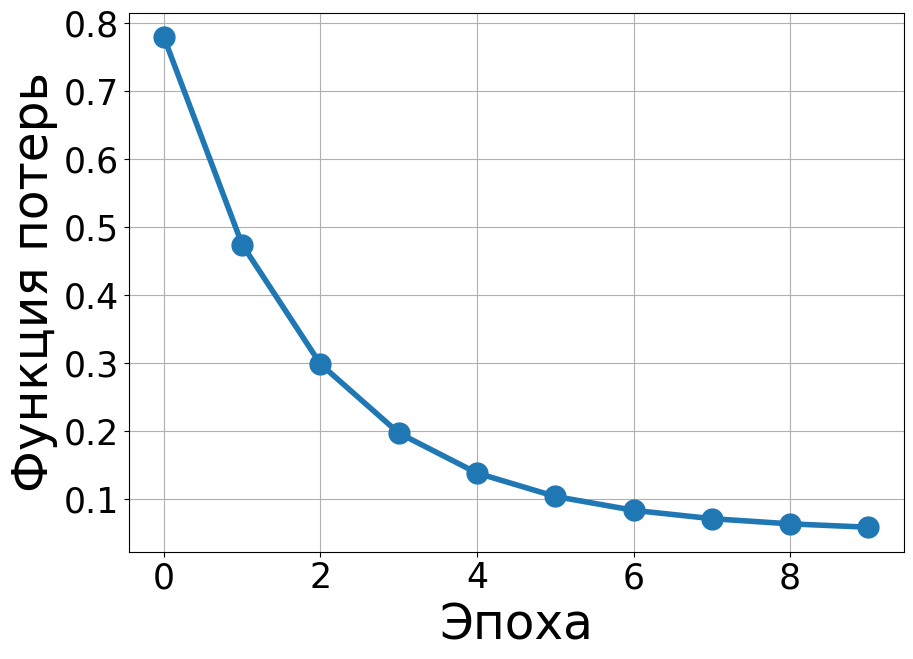

-17.297360012762805, -22.65400280122147


Model visualization:


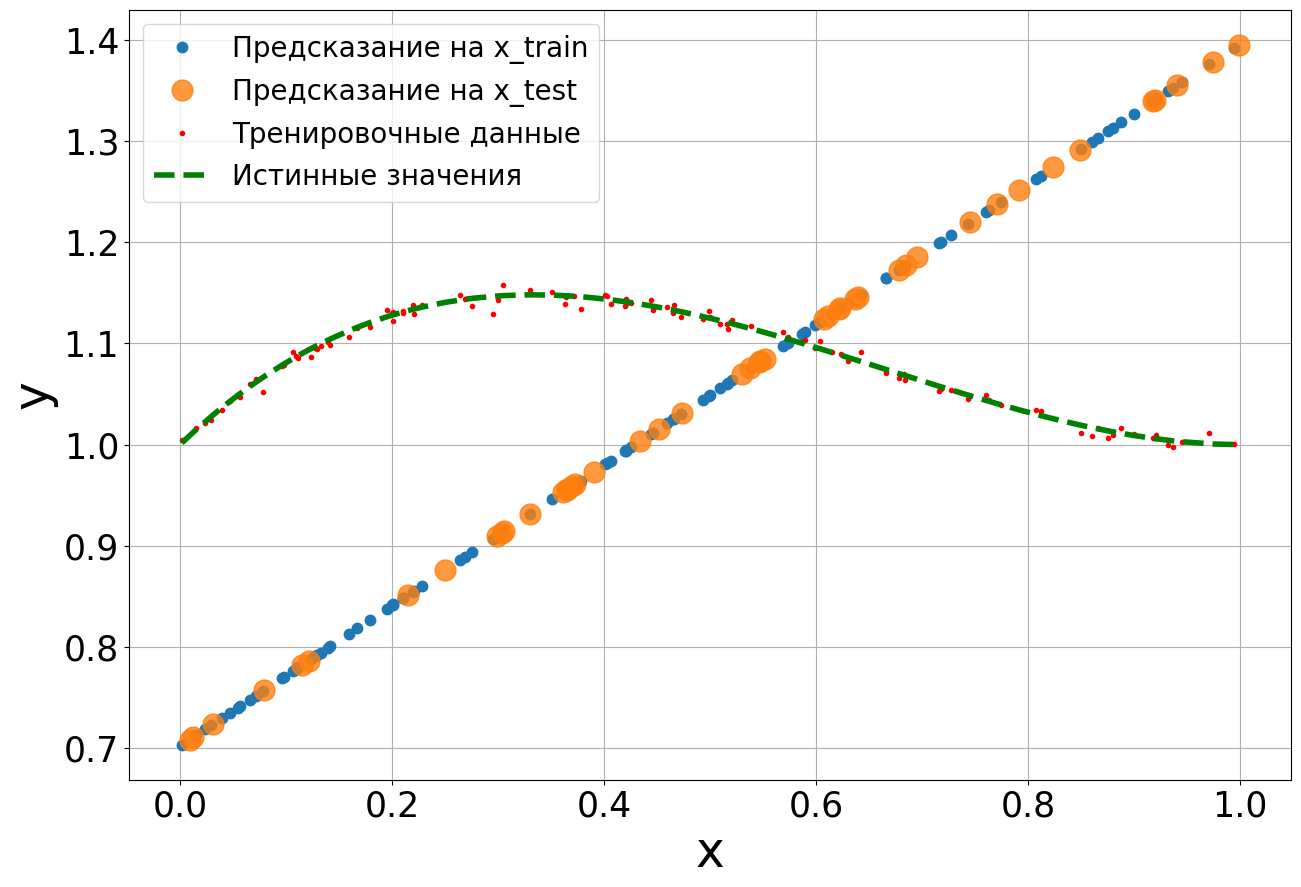


Weights:


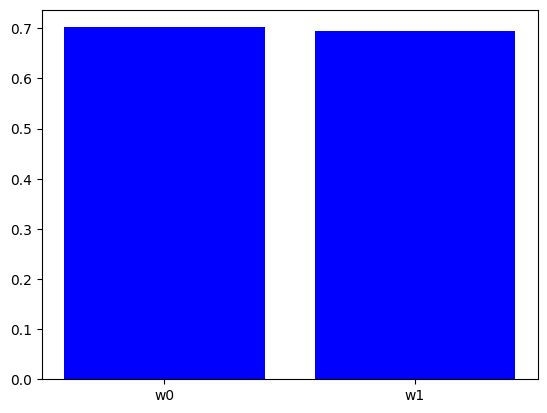


Predicts:
-1.191158340103768, -1.3333054783332252


Weights:


array([1.02276626, 0.13541067])

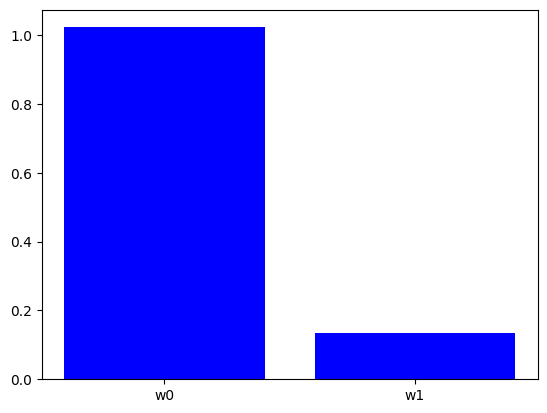


Cost function:


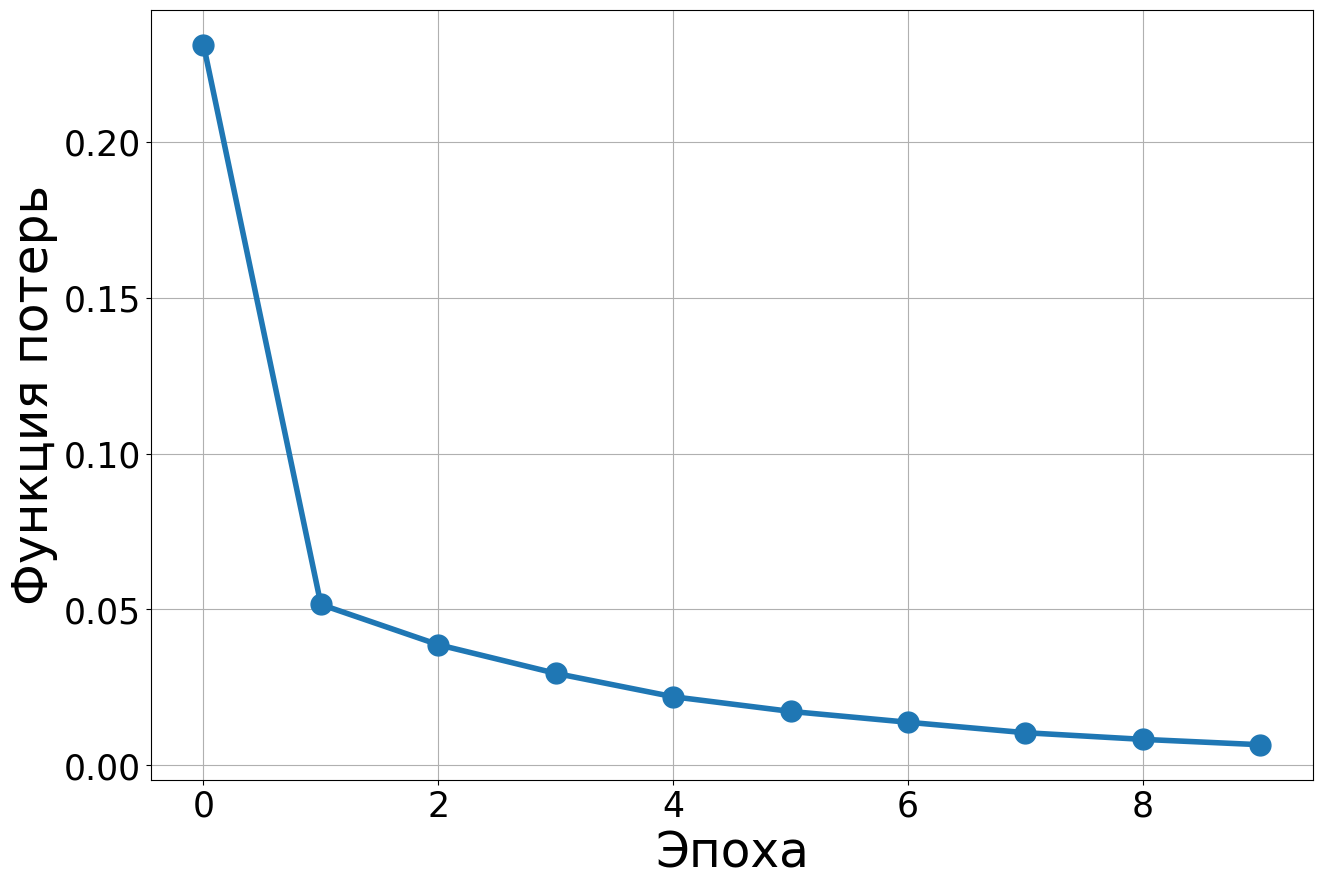


Final model visualization:


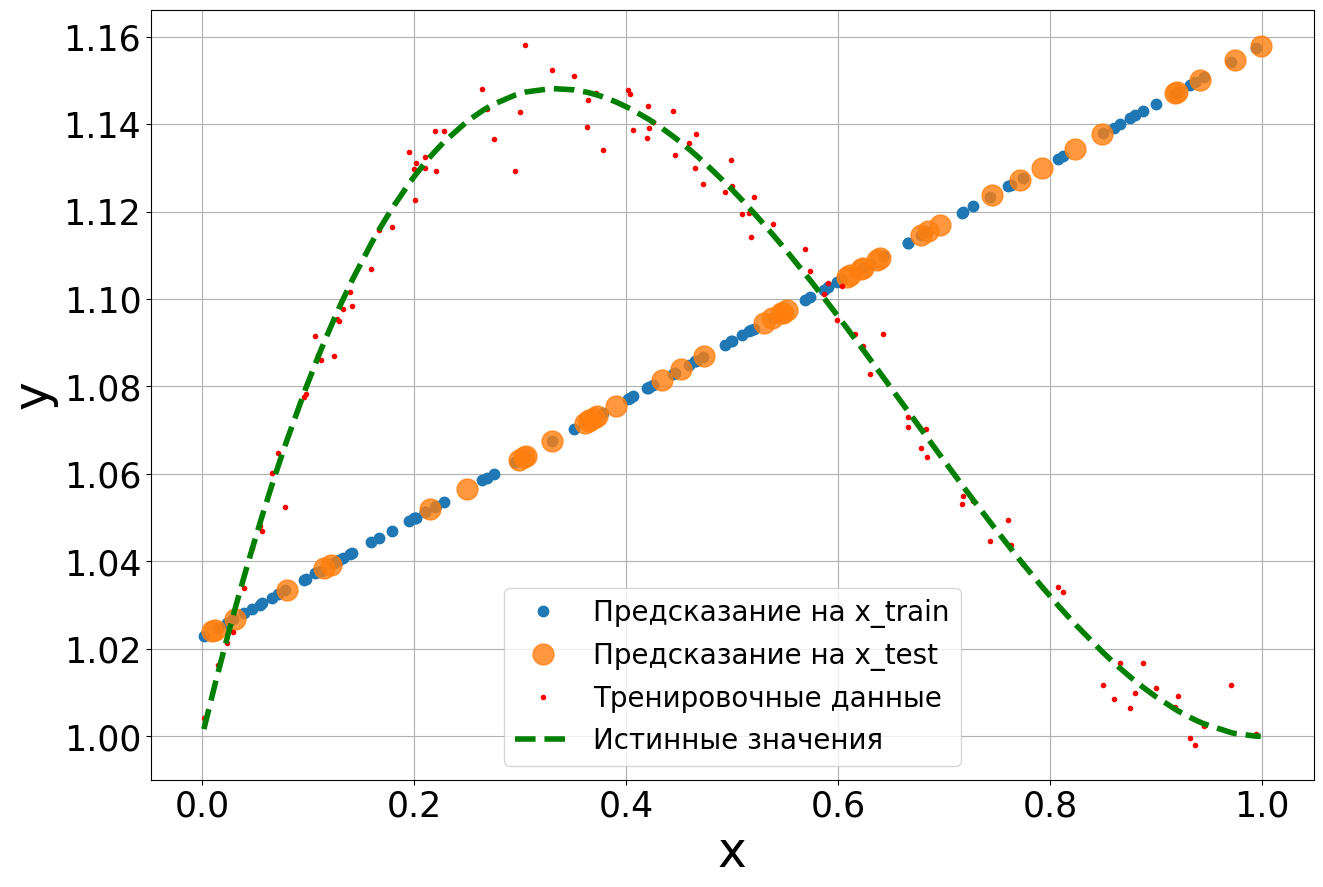

array([1.02276626, 0.13541067])

In [45]:
run_all(polynomial_1_y, polynomial_1_y_true, polynomial_1_x)

### 2.5 execution for x^3 - 3x^2 + 1x + 1 [1.3.2]

(105, 1) (105,) (45, 1) (45,)
Weights [0.         0.49671415]

Первая точка-признак [0.8919963],
Предсказание [0.44306718],
Реальное значение [2.05260682],
Функция потерь: [0.37440922]



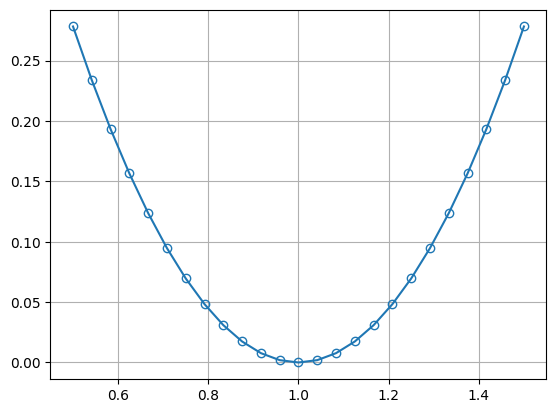

Grad function:
 [-1.22377975 -0.00402564]

Weight values:
[0.12237798 0.49711672]
Веса [0.12237798 0.49711672]

Первая точка-признак [0.8919963],
Предсказание [0.56580425],
Реальное значение [1.05495706],
Функция потерь: [0.23927048]



array([ 0.13800585,  1.09373642, -0.83150813,  0.00673461,  0.07872117,
        1.13371604,  0.46626683, -1.0189834 ,  0.37273905,  0.0165495 ,
       -0.69813261,  1.14275611,  0.98717359,  1.06386404,  1.04301684,
        0.49021275, -0.46152811,  0.27022984,  0.36923515, -1.2322477 ,
        1.03103384, -0.9161205 ,  1.03553276, -0.91676066, -1.20253364,
       -1.08337486, -0.34952289, -1.19543443,  0.40356543,  0.93493116,
        0.91610386,  1.07075858,  0.44365867,  1.1337463 ,  0.94075593,
       -0.82922382,  0.72839069,  0.94726453,  1.01278051,  1.01716028,
       -1.17472725, -0.19404798, -0.00917815,  1.06267995,  1.00594312,
        0.13338189, -1.04667855, -1.04911441,  0.18857048, -0.65314879,
       -0.26609562, -0.56829667,  0.27636881,  1.05495706, -0.78418202,
        0.22577772,  0.92885086,  0.9767827 ,  0.64832736,  0.50269704,
       -0.88920245,  1.01382353,  1.03293414,  1.04504204, -0.24657261,
        0.85217964, -0.32252686, -0.87406896,  0.65341936, -0.41


Cost function:


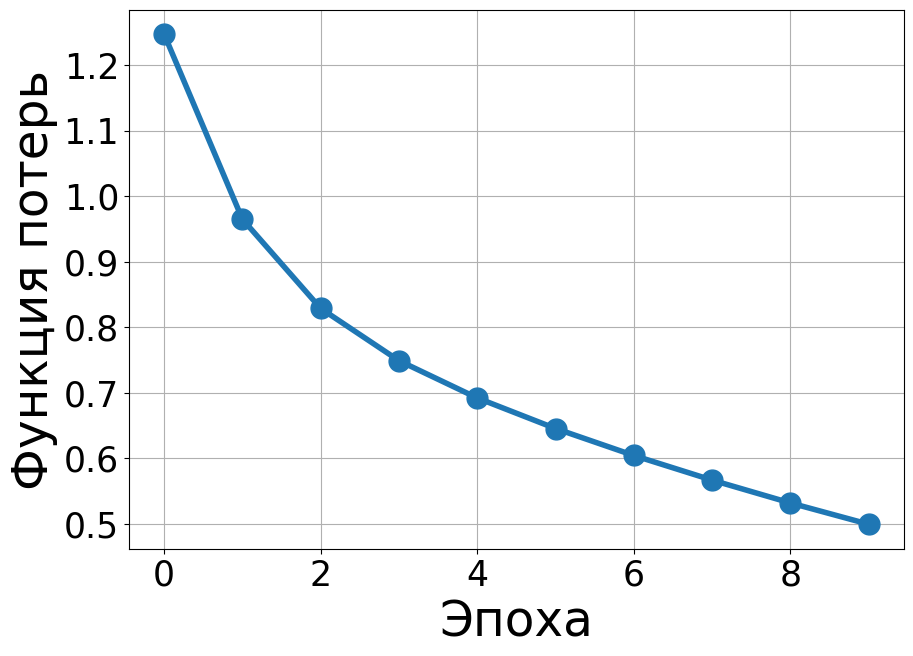

0.3232528134224699, 0.2664950873329641


Model visualization:


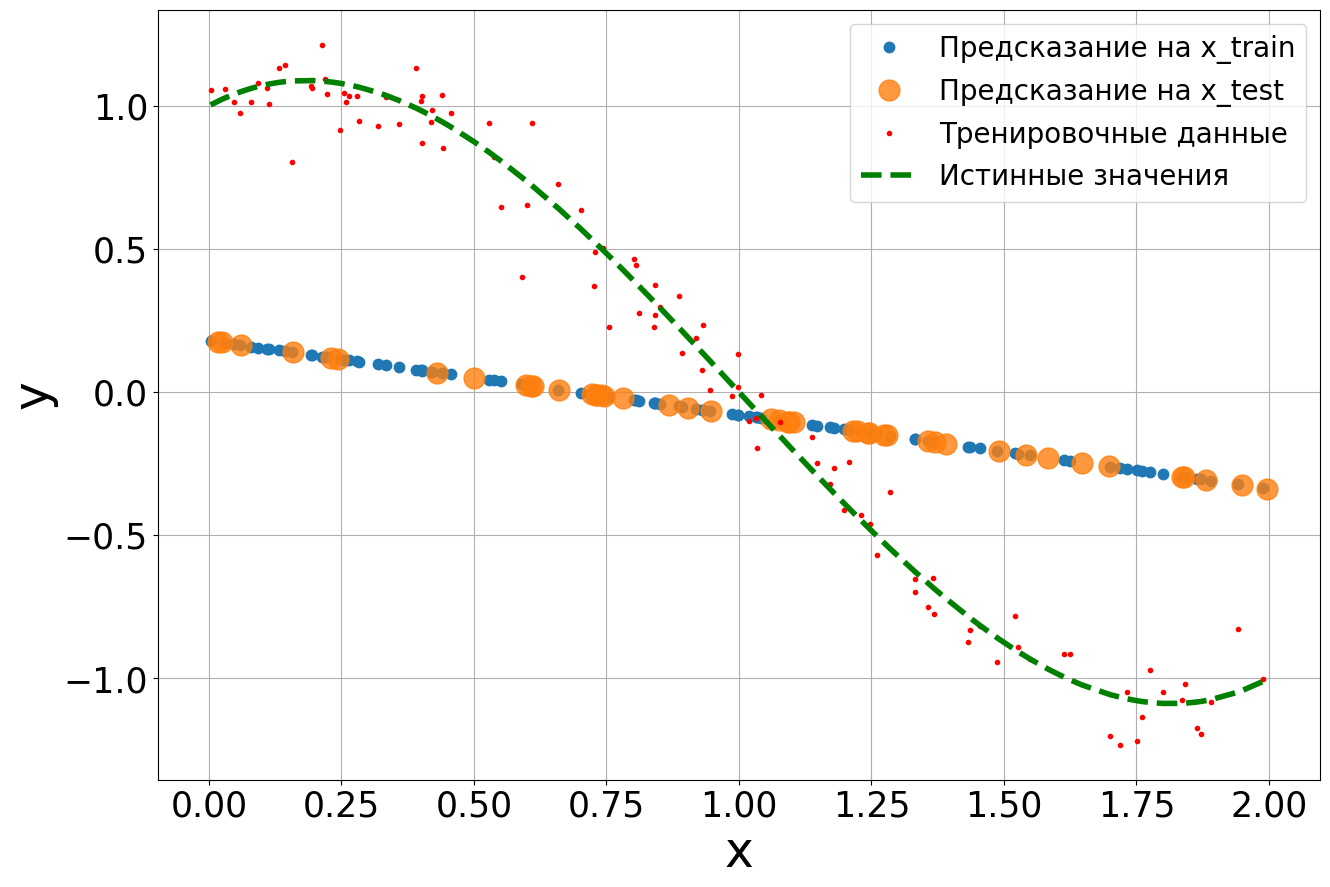


Weights:


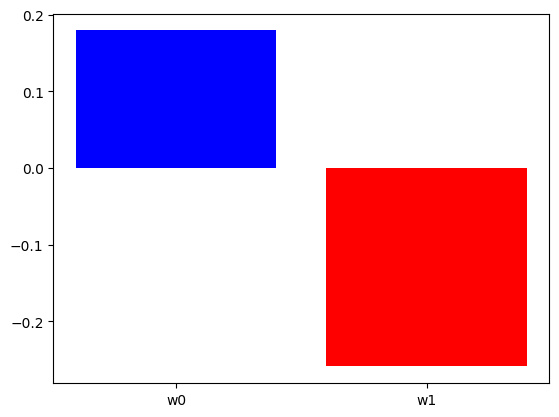


Predicts:
0.9392715313095461, 0.9517475761735588


Weights:


array([ 1.3182573 , -1.37426652])

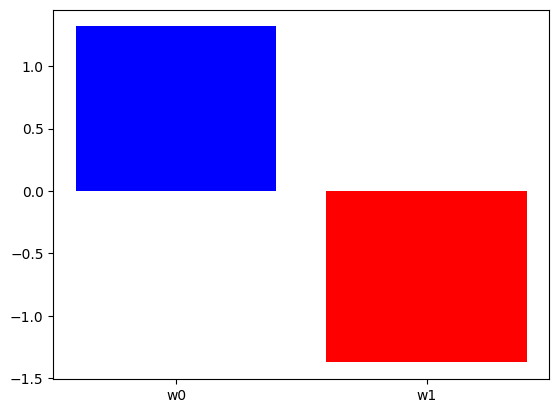


Cost function:


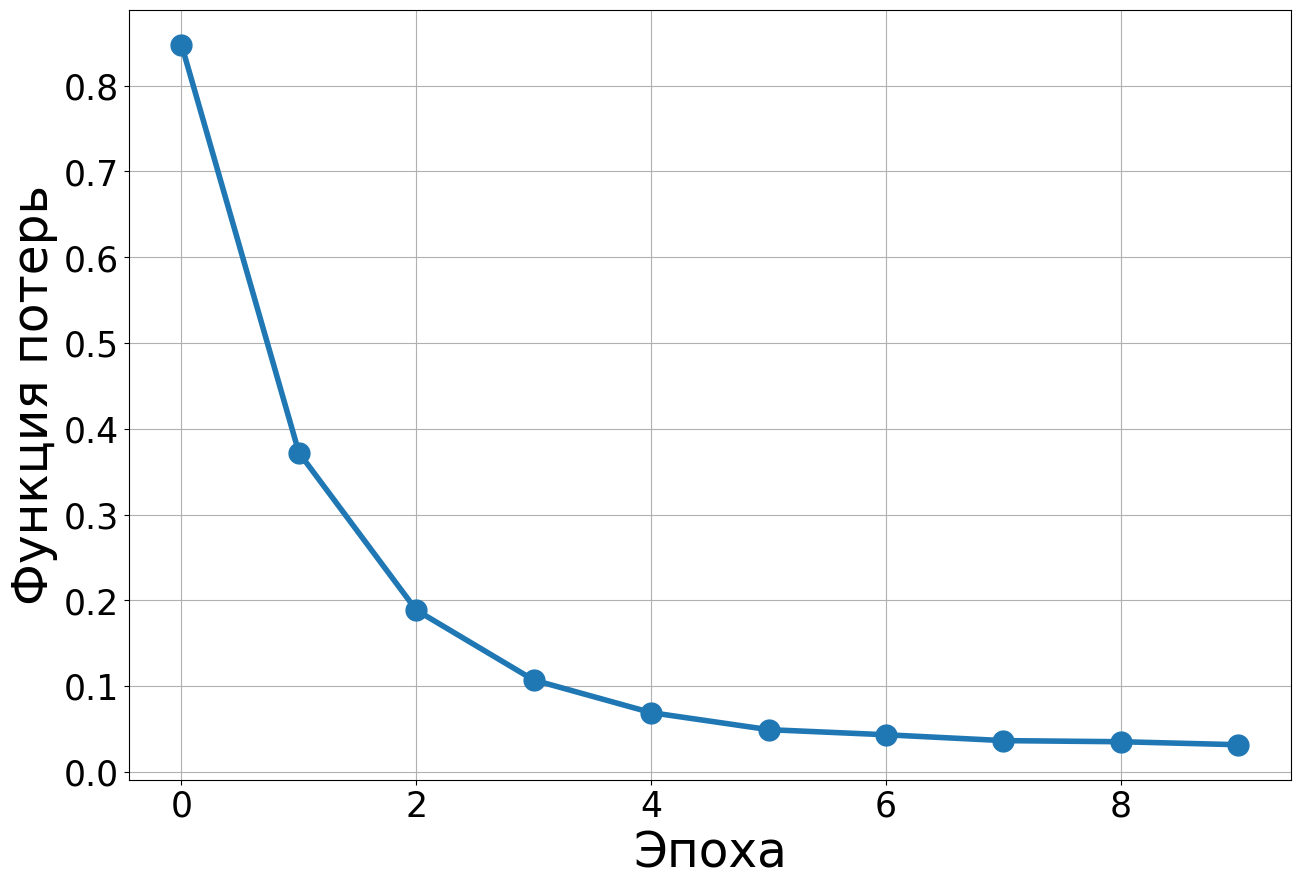


Final model visualization:


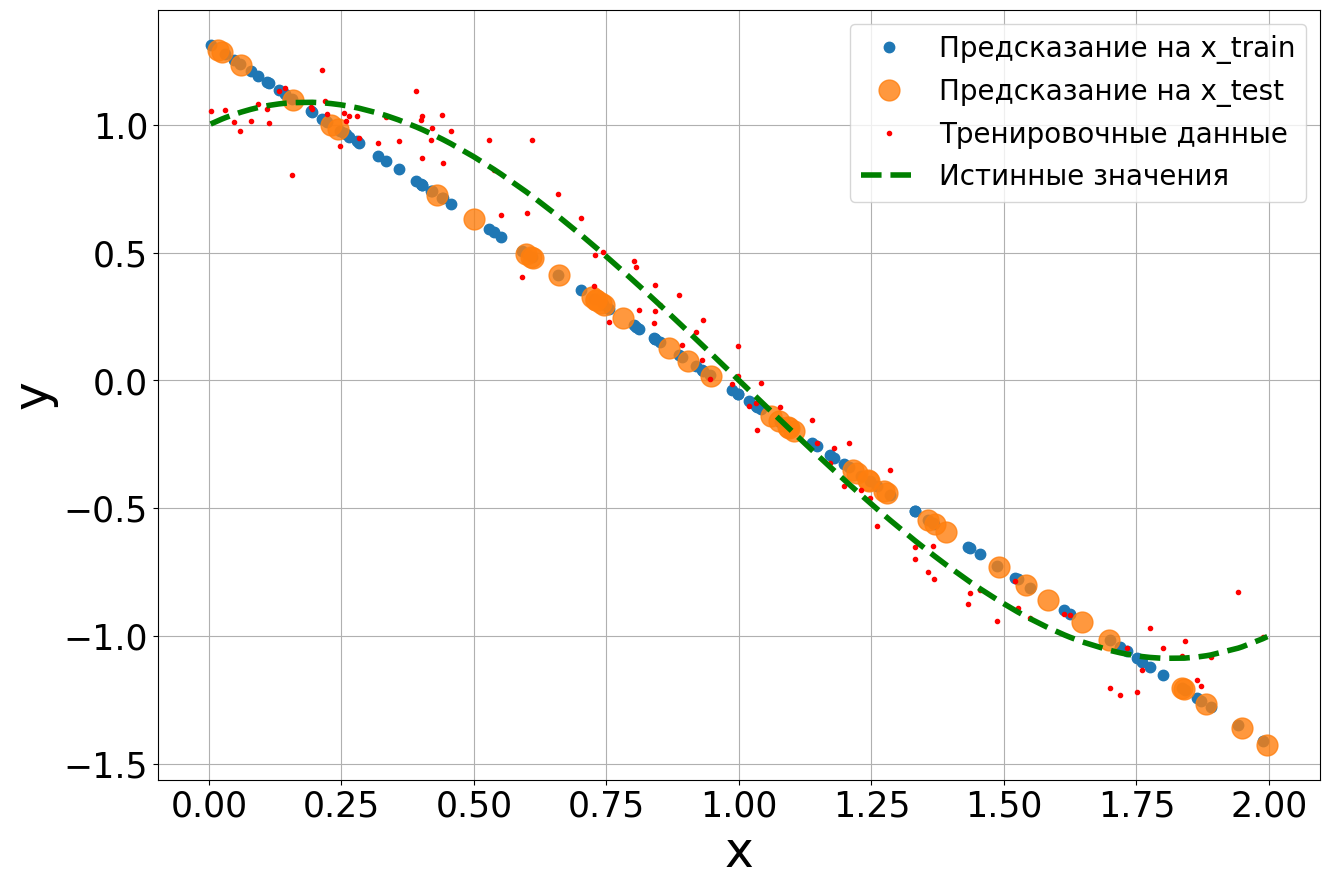

array([ 1.3182573 , -1.37426652])

In [46]:
run_all(polynomial_2_y, polynomial_2_y_true, polynomial_2_x)

### 2.6 execution for x - 4x^2 + 3x^3 + 2x^4 [1.3.3]

(105, 1) (105,) (45, 1) (45,)
Weights [0.         0.49671415]

Первая точка-признак [0.8919963],
Предсказание [0.44306718],
Реальное значение [2.05260682],
Функция потерь: [1.45547044]



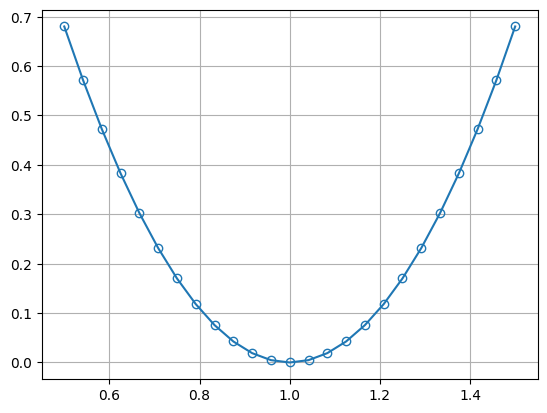

Grad function:
 [-2.41285759 -0.00793713]

Weight values:
[0.24128576 0.49750787]
Веса [0.24128576 0.49750787]

Первая точка-признак [0.8919963],
Предсказание [0.68506093],
Реальное значение [1.64949598],
Функция потерь: [0.93013496]



array([-2.01994646e+00,  1.15303621e+00, -1.02111367e+01, -2.78173445e+00,
       -2.11930734e+00,  2.65702340e+00,  5.21183739e-01, -2.56421497e+01,
        2.98976885e-02, -1.80837198e+00, -8.00222064e+00,  1.79478154e+00,
        1.13371367e+00,  9.31335120e-01,  5.27280651e-01, -4.86358369e-01,
       -5.19164152e+00, -1.22747810e+00, -2.03498948e+00, -2.21677369e+01,
        8.96277438e-01, -1.45500181e+01,  6.16756279e-01, -1.48409067e+01,
       -2.10016051e+01, -2.95337879e+01, -3.66653406e+00, -2.97721239e+01,
       -3.88442029e+00, -1.23753391e-01, -9.96648433e-01,  8.40210886e-01,
        3.07779579e-01,  1.71476515e+00,  1.89933227e+00, -3.00961652e+01,
        1.29914036e+00, -4.64731370e-01,  6.85471339e-01,  1.29431084e+00,
       -2.90023833e+01, -3.92041797e+00, -1.52316761e+00,  7.40244862e-01,
        1.85511878e-01, -3.65265953e-01, -2.03386591e+01, -2.36417360e+01,
       -9.33720303e-01, -7.43963949e+00, -3.17584346e+00, -6.47261769e+00,
       -1.67904468e+00,  


Cost function:


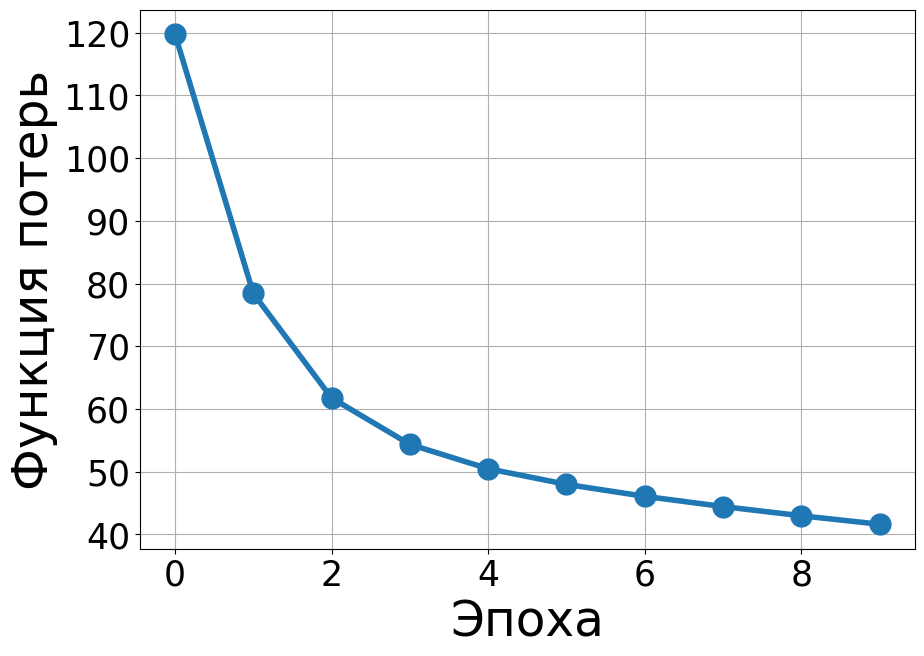

0.47121172582948934, 0.5071974963477783


Model visualization:


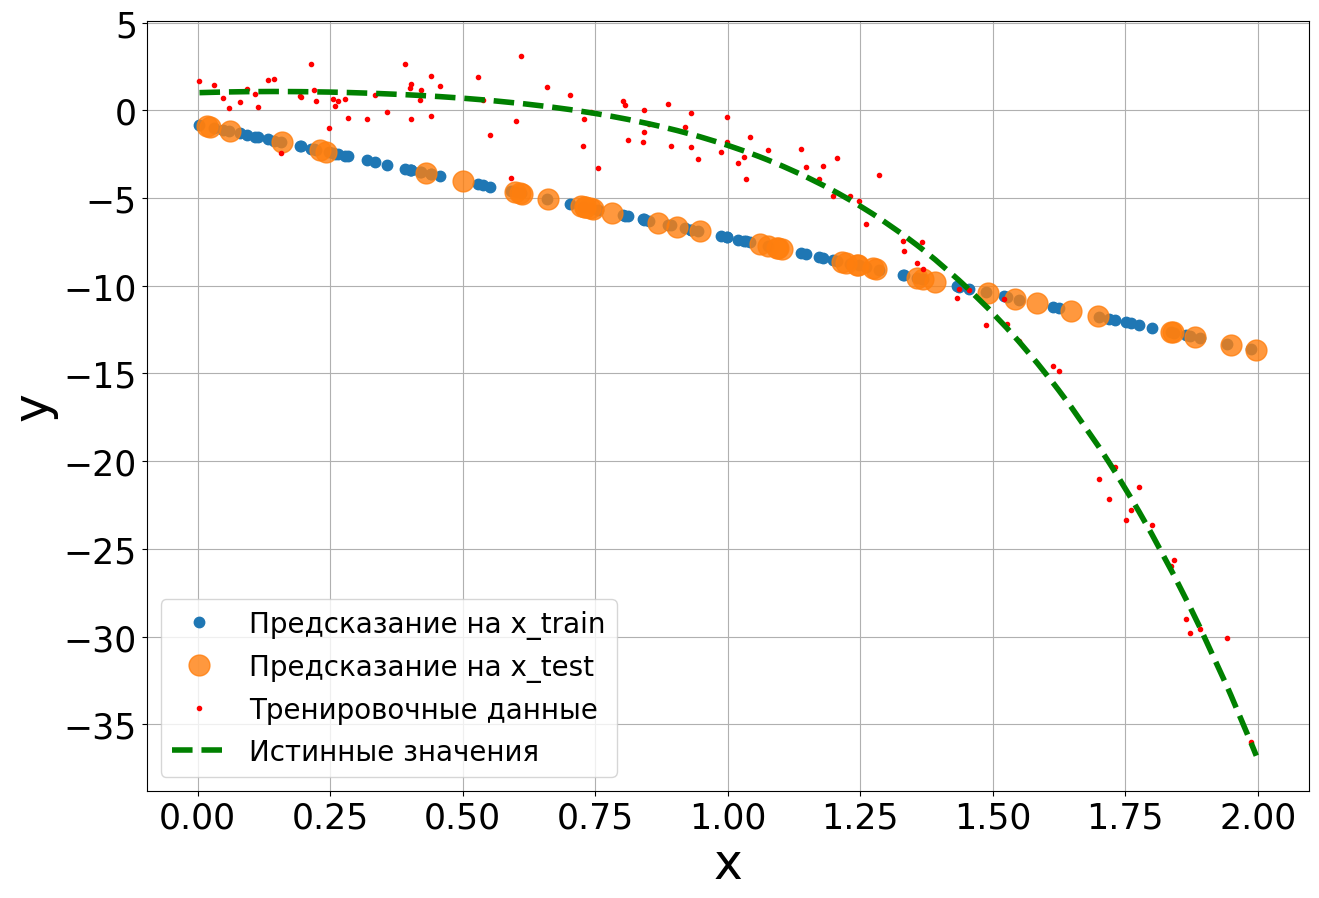


Weights:


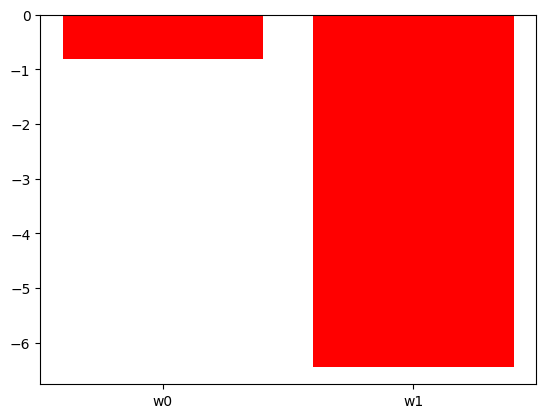


Predicts:
0.7093541453787648, 0.7285226793867269


Weights:


array([  6.610874 , -13.4155634])

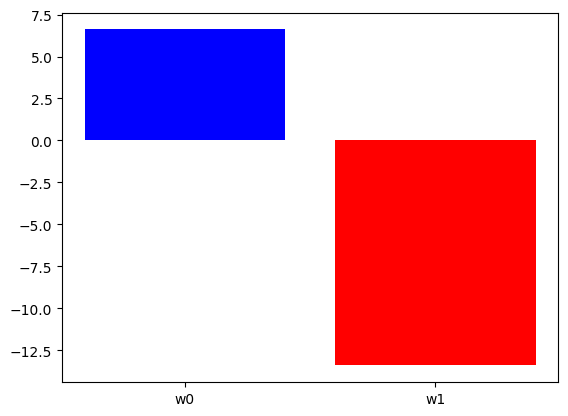


Cost function:


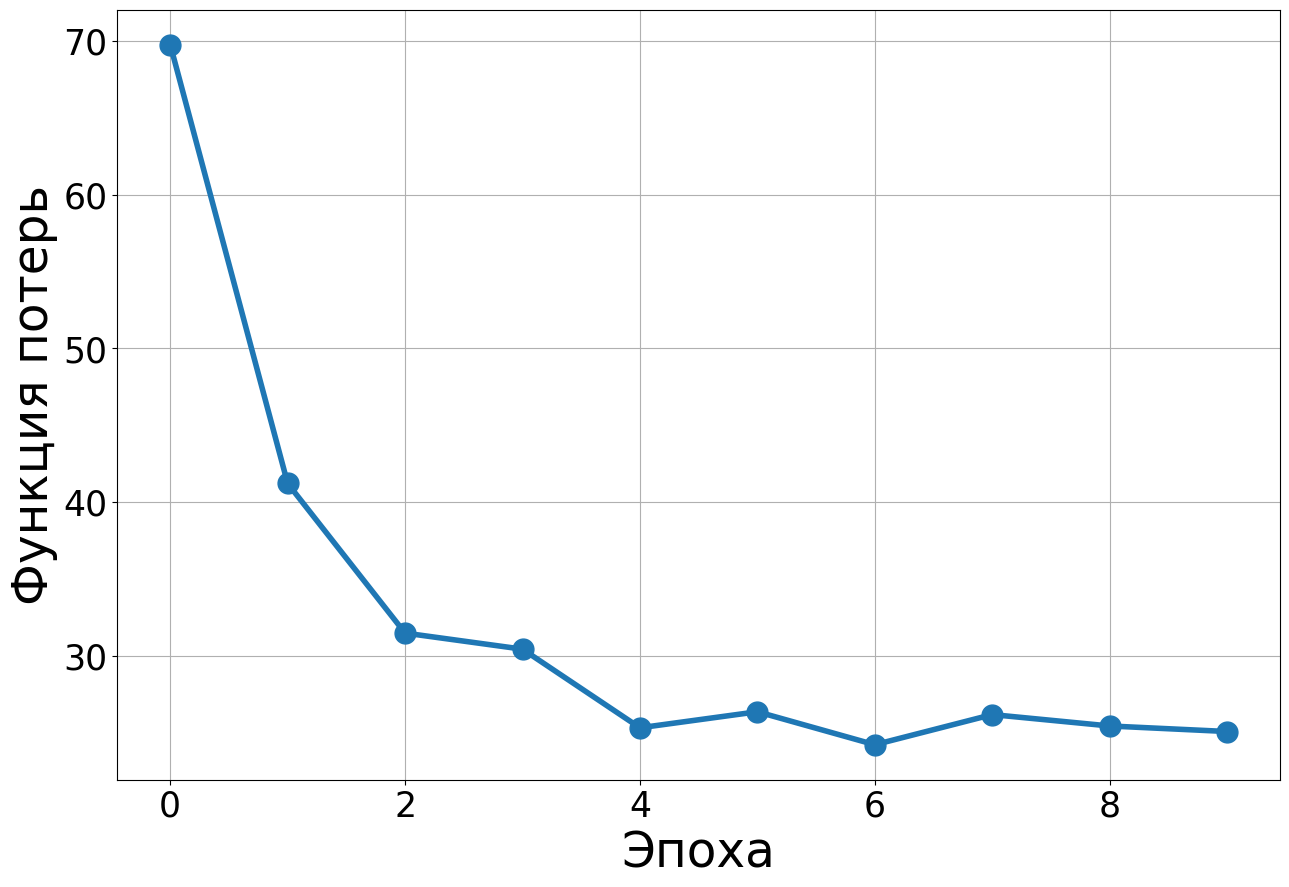


Final model visualization:


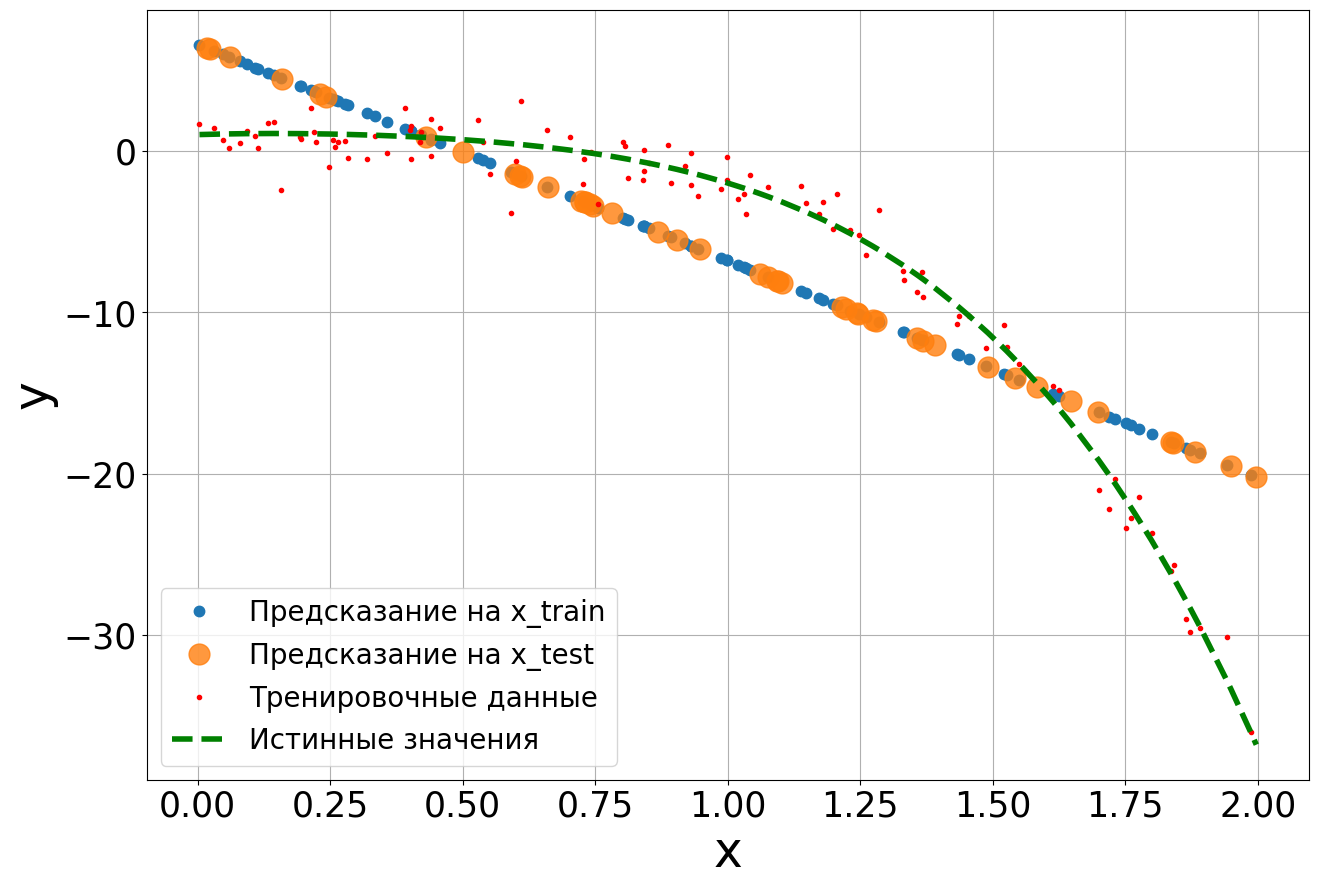

array([  6.610874 , -13.4155634])

In [47]:
run_all(polynomial_3_y, polynomial_3_y_true, polynomial_3_x)

### 2.7 Different regressions

#### 2.7.1 polynomial data

In [48]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)        
        self.n_batches = n_batches
    
    
    #---------------------------------
    def forward(self, X):
        # умножаем признаки на веса
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        # расчет функции потерь
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        # расчет градиента
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        # обновление весов
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        # инициализируем веса
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        # делем предсказание модели
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):    
        # оценка по коэффициенту детерминации     
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):
        # обучение модели с учетом разбиения на батчи
        np.random.seed(self.seed)

        if self.weights is None: # если веса не заданы - задаем
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: # если смещение не задано - задаем
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]: # если веса заданы, но не добавлено смещение - объединяем 
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:   # проверка на согласование размерности батча и размерности данных         
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): #циклы обучения, как раньше
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        # загрузка батча
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch) # тут мы всегда добавляем смещение
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        # добавление смещения
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        # отрисовка сразу в методе
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        # "новый" метод - который возвращает веса модели и смещение
        return (self.weights[1:], self.bias)

In [49]:
def vis_data(y, y_true,x, title):
    """Визуализация полученного набора данных  
    Входные переменные:
    ===========
    y: зашумленные значения зависимостей
    y_true: зависимости без шума
    x: массив входных данных
    title: общий заголовок
    """
    fig = plt.figure(figsize=(15,10))# создаем "полотно", на котором будем "рисовать" график
    # рисуем с помощью библиотеки matplotlib
    plt.scatter(x[:,0], # какую переменную используем для горизонтальной оси - массив данных х
                y, # какую переменную используем для вертикальной оси - зашумленные значения зависимостей
                edgecolor='b', #  цвет маркера
                label="Noise", # название зависимости, которое будет отображено в легенде 
                s=196, # квадрат радиуса 
                alpha = 0.6) # прозрачность
    plt.scatter(x[:,0], y_true,label="Real data", s=81,c='g', alpha = 0.8) # аналогично вышеописанному, только для зависимости без шума
                                                                                # и с другими параметрами маркеров (цвет, размер, прозрачность, название)
    plt.grid() # чтобы была сетка
    plt.xlabel('x',fontsize=35) # название горизонтальной оси 
    plt.ylabel('y',fontsize=35) # название вертикальной оси
    plt.legend(fontsize=25) # чтобы была легенда
    plt.title(title, fontsize=25 ) # заголовок
    plt.xticks(fontsize = 25) # чтобы промежуточные значения горизонтальной оси были не маленькими
    plt.yticks(fontsize = 25);# чтобы промежуточные значения вертикальной оси были не маленькими
    plt.tight_layout() # чтобы полотно было без пустого пространство
    plt.show()

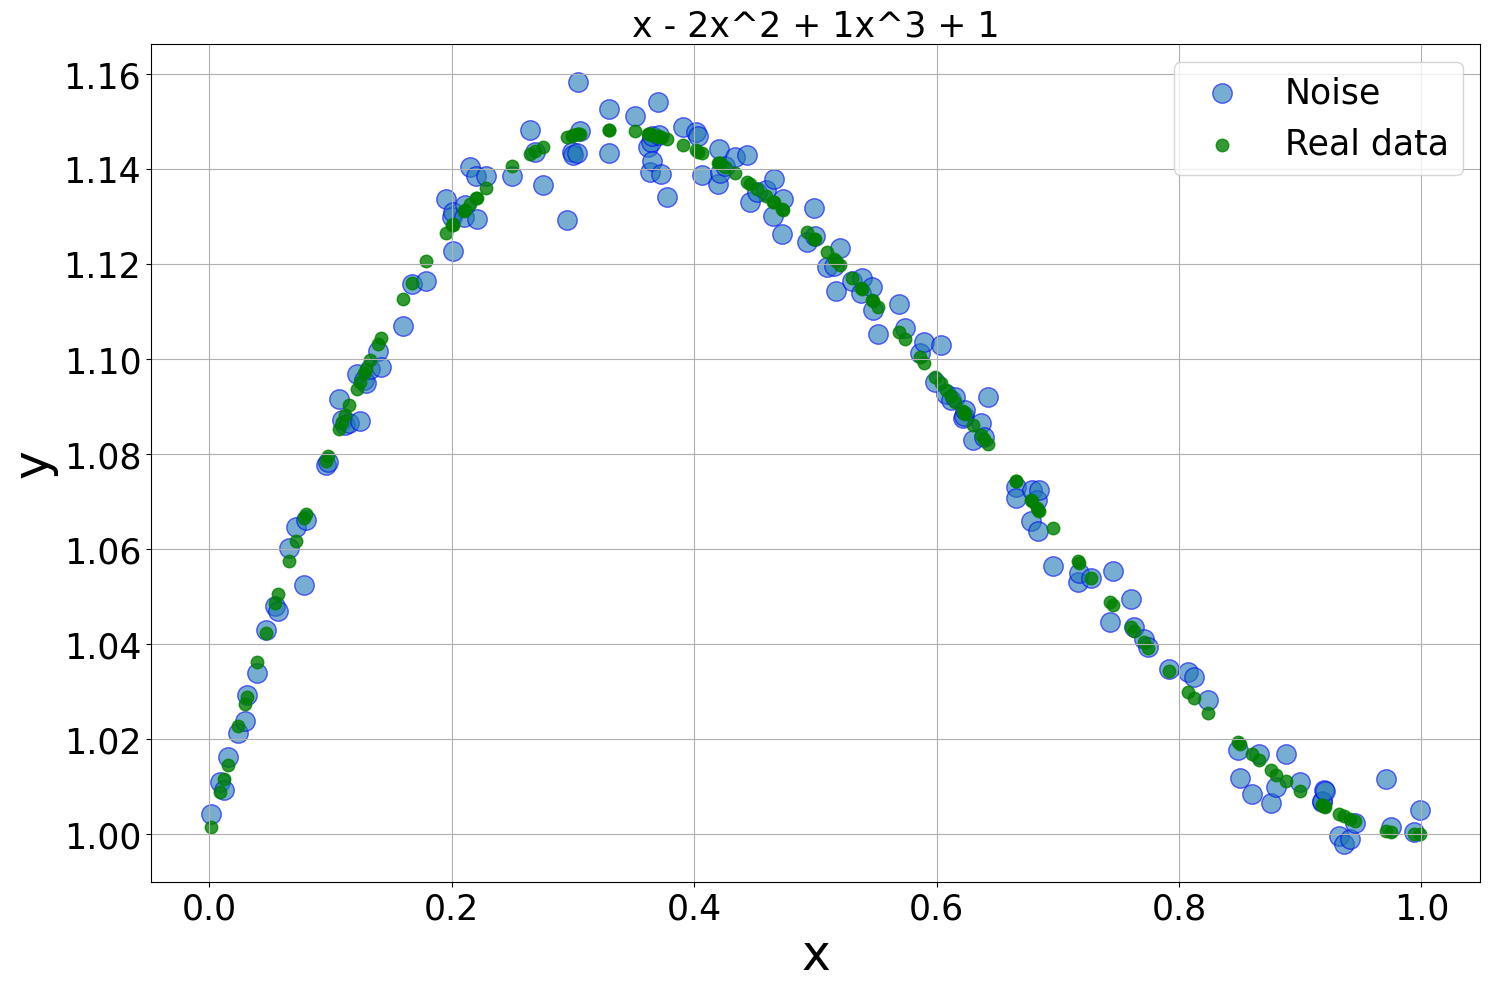

In [50]:
vis_data(polynomial_1_y, polynomial_1_y_true, polynomial_1_x, "x - 2x^2 + 1x^3 + 1")

In [51]:
regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
regr_poly_lin.fit(x_train, y_train)

In [52]:
def plot_model_class(x_train, y_train, x_test, x, y, model):
    """Отрисовка модели которая реализована через классы.   
    Входные переменные:
    ===========
    x_train: признаки на которых тренировались
    y_train: тренировочные целевые значения
    x_test: тестовые признаки
    x: полные признаки
    y: реальные целевые значения (без шума)
    model: обученная модель
    """
    fig = plt.figure(figsize=(15,10))
    plt.plot(x_train[:,0], model.predict(x_train),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], model.predict(x_test),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные значения", linewidth=4,c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35);
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25);
    plt.show()

In [53]:
def to_polynom(x, order = 1, add_bias = False):
    """Генерация полиномиальных признаков .   
    Входные переменные:
    ===========
    x: признаки 
    order: порядок полинома
    add_bias: добавляем ли константу (так вроде делает и scikit-learn)
    """
    order_range = range( 0 if add_bias else 1, order+1,1)
    x = np.atleast_1d(x)[:]    
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x,i))# складываем в выходную переменную все степени от 0/1 до order
    return out.reshape(-1, x.size).T

In [54]:
x_ = to_polynom(polynomial_1_x, order=7) 
x_train, x_test, y_train, y_test = train_test_split(x_, polynomial_1_y,  test_size=0.3, )

In [55]:
regr_poly = LinearRegression(learning_rate=0.2,
                        epochs=220,batch_size=10,
                        n_batches=None)

In [56]:
regr_poly.fit(x_train, y_train)

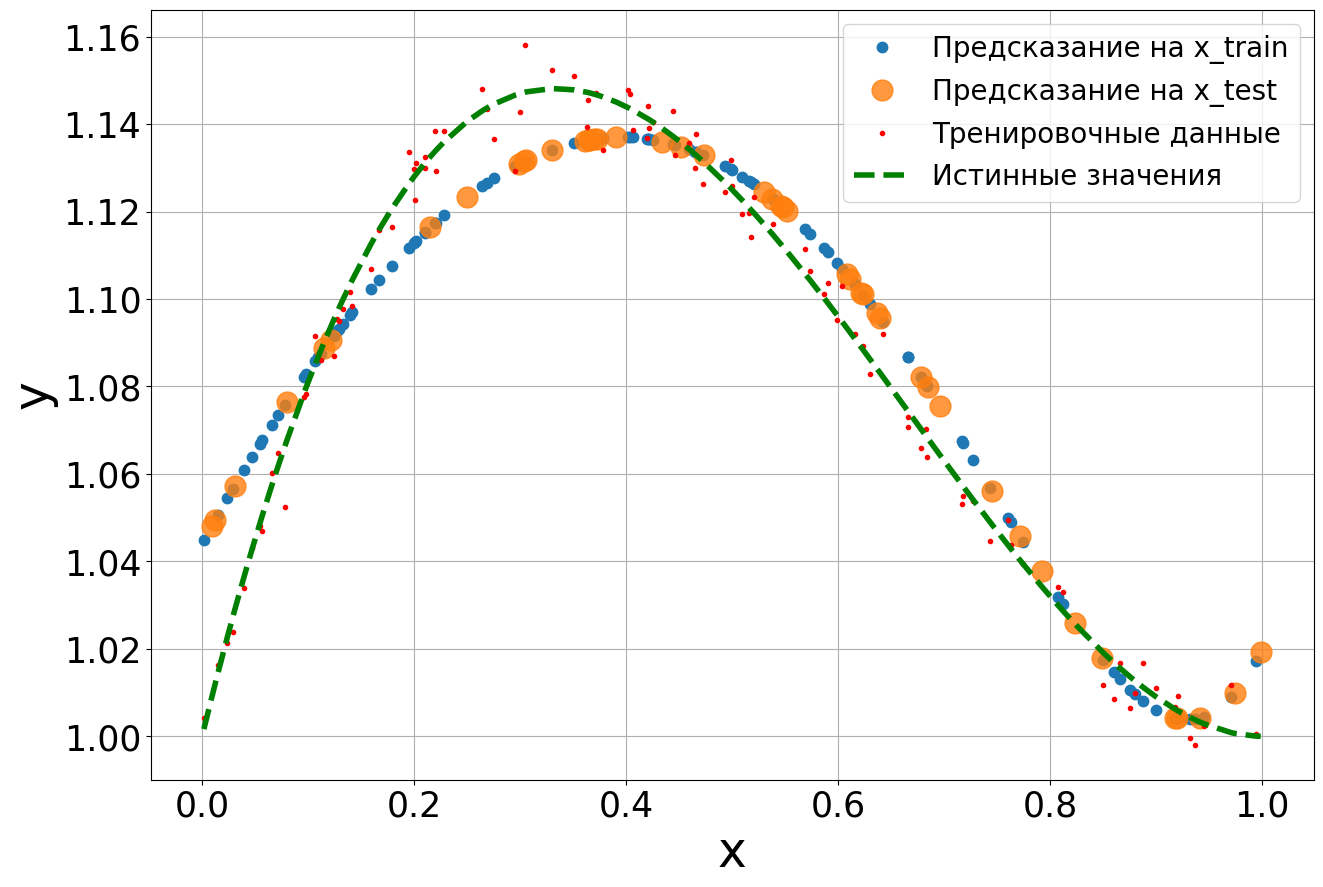

In [57]:
plot_model_class(x_train, y_train, x_test, polynomial_1_x, polynomial_1_y_true, regr_poly)

In [58]:
w, b = regr_poly.get_w_and_b()
print(w,b)

[ 0.44059553 -0.45059622 -0.21123217  0.21895541 -0.32794946 -0.22817663
  0.53431333] 1.0441996482495706


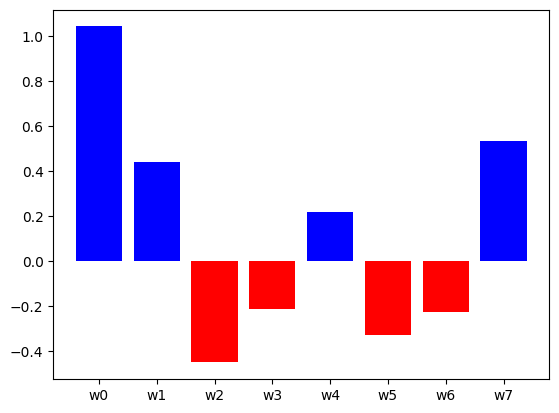

In [59]:
vis_weights(np.hstack([b, w]))

#### 2.7.2 harmonic data

## 3. Execution block for cars moldova

### 3.1 